In [3]:
import os
file_path = 'data/processed_data/3_4_90bpm_1.npy'
print(os.path.exists(file_path))  # Should print True if the file exists


False


In [5]:
import os
print(os.getcwd())  # Prints the current working directory


/Users/kravtsova/Desktop/uni/2024/thesis/thesis B/conductor_1/notebooks


In [ ]:
os.chdir('/path/to/your/project/root')

Shape of the data: (147, 21, 3)


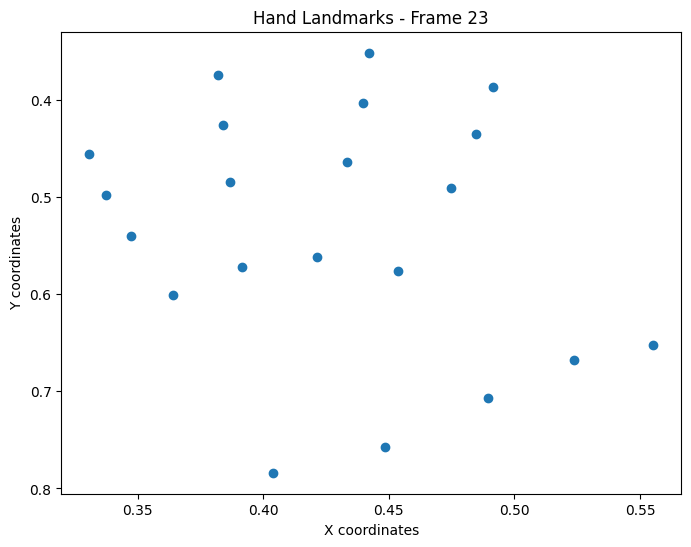

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from one of your .npy files
file_path = '/Users/kravtsova/Desktop/uni/2024/thesis/thesis B/conductor_1/data/processed_data/4_4_60bpm/4_4_60bpm_sample_1.npy'  # Replace with your file path 
data = np.load(file_path)

# Check the shape of the data
print("Shape of the data:", data.shape)

# Example: Plot the landmarks of the first frame
frame_index = 23  # You can change this to visualize different frames
landmarks = data[1]

# Separate x, y, z coordinates
x_coords = landmarks[:, 0]
y_coords = landmarks[:, 1]

# Visualize the landmarks in 2D (x, y)
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords)
plt.title(f'Hand Landmarks - Frame {frame_index}')
plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')
plt.gca().invert_yaxis()  # Invert y-axis for a more natural visual representation
plt.show()



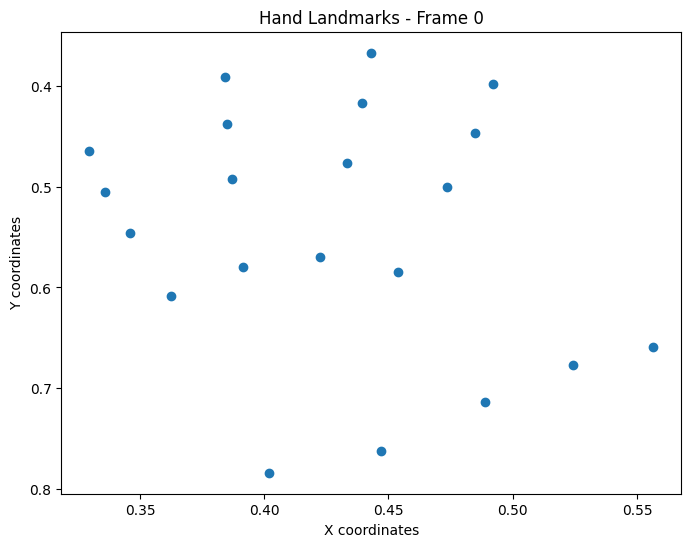

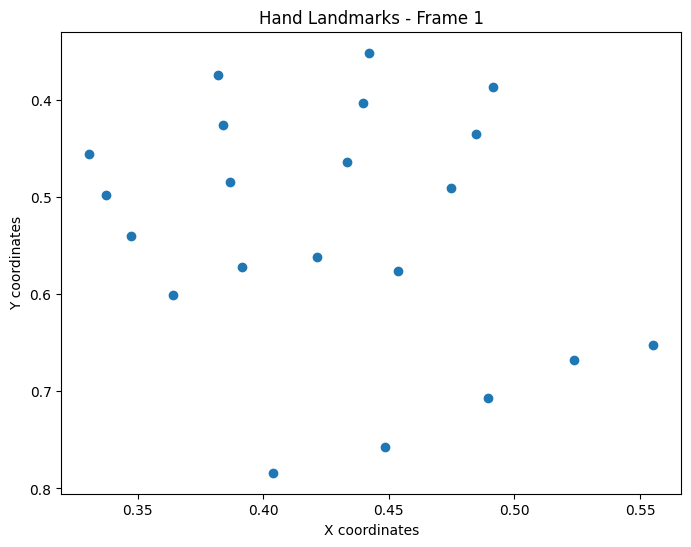

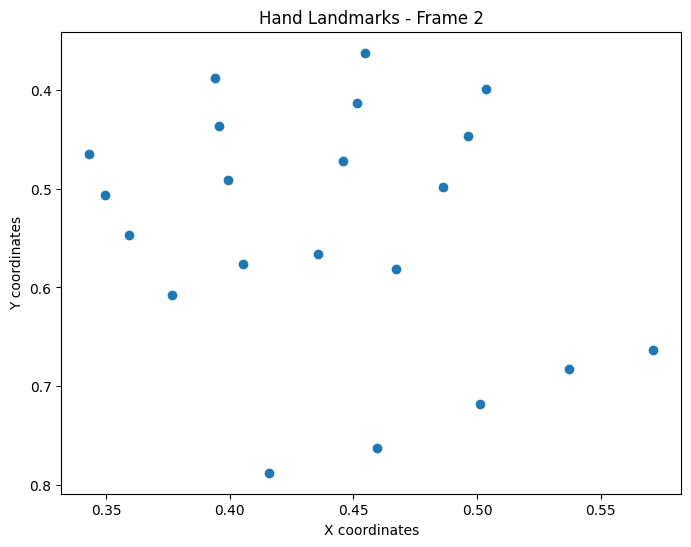

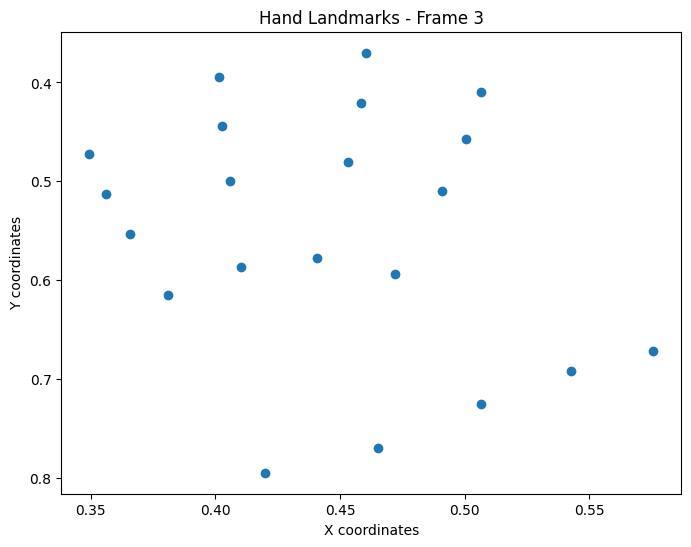

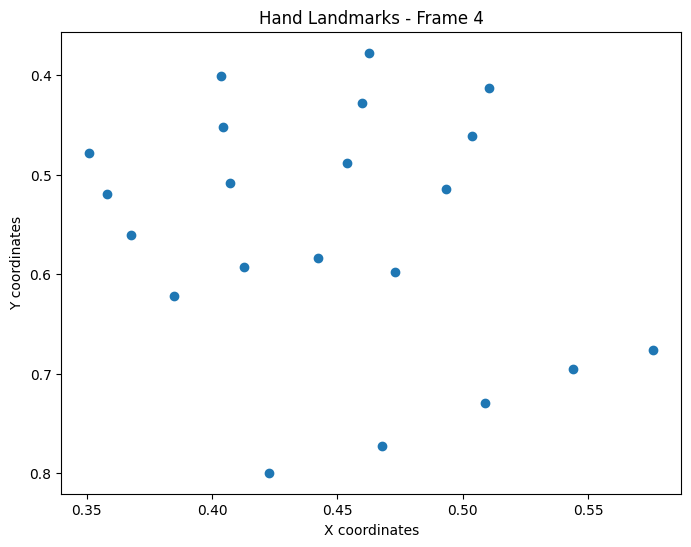

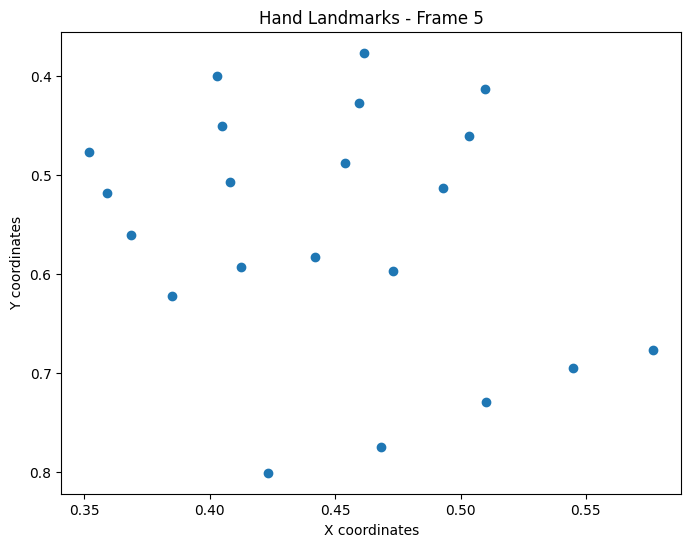

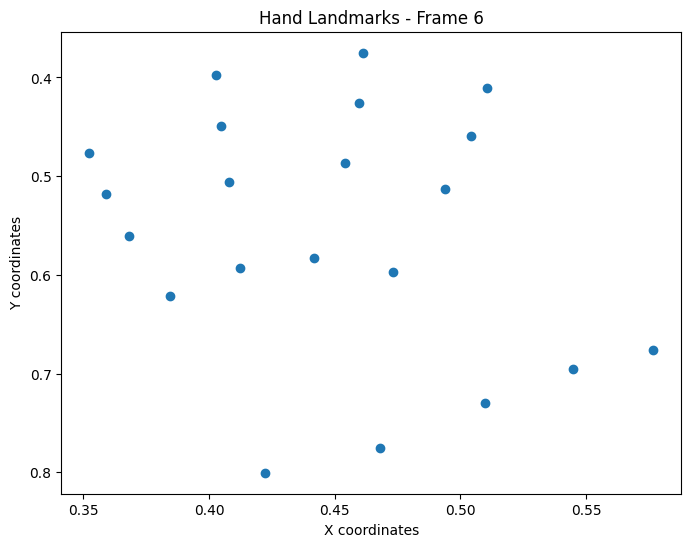

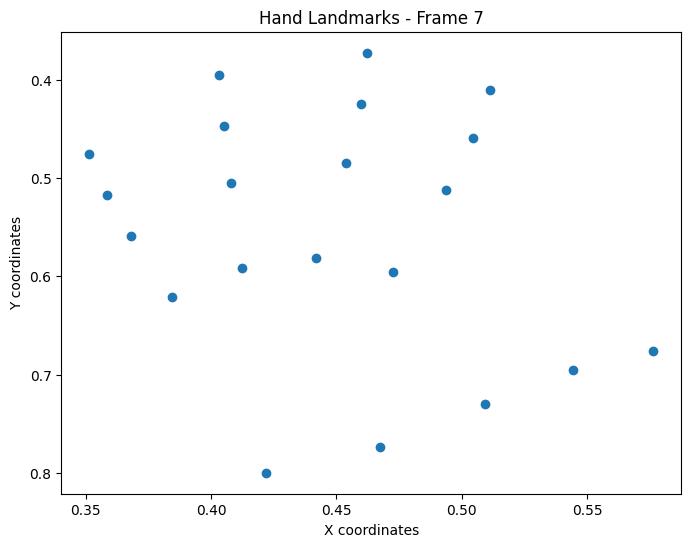

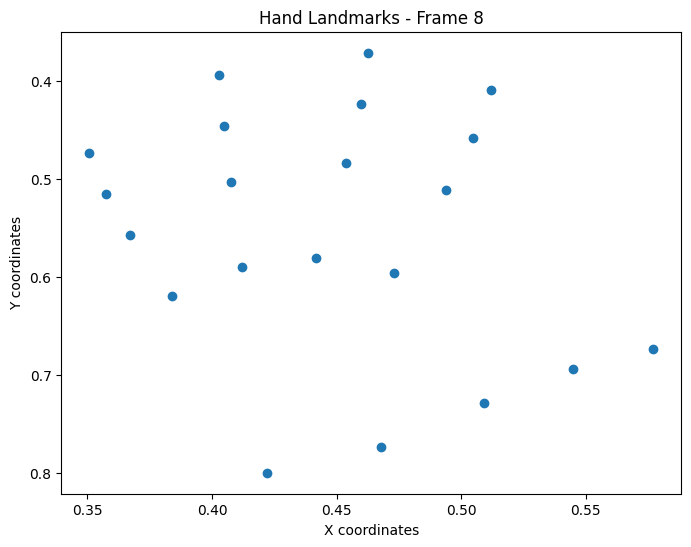

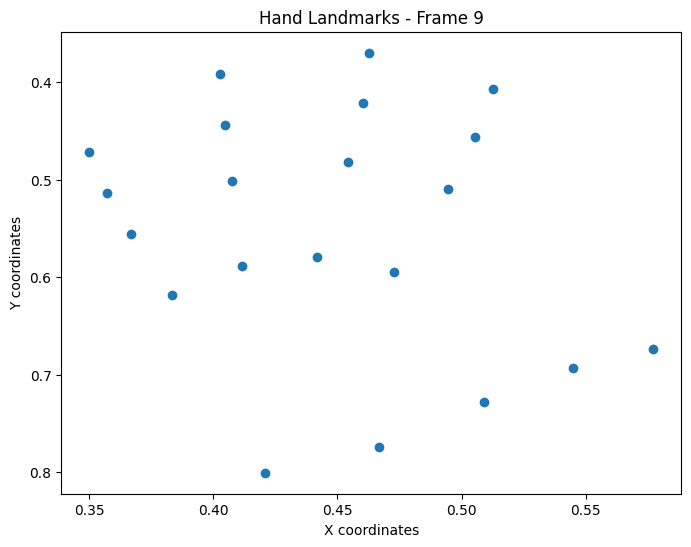

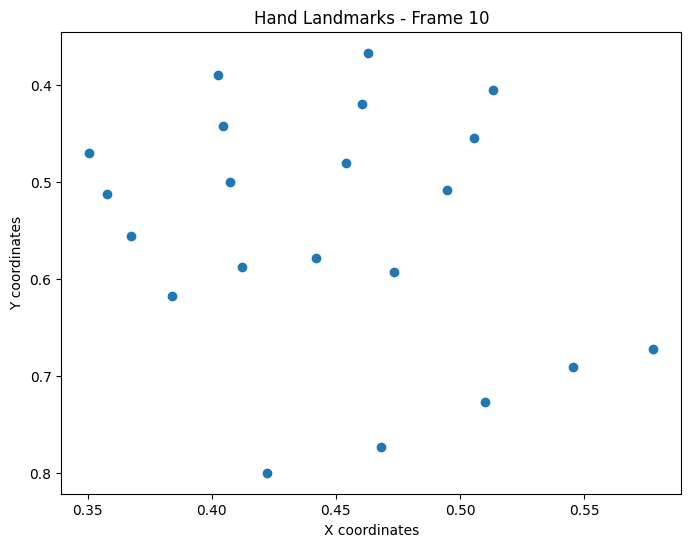

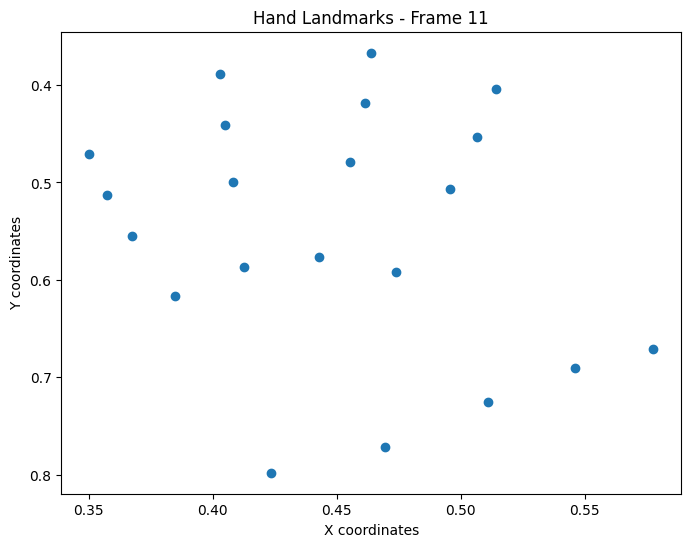

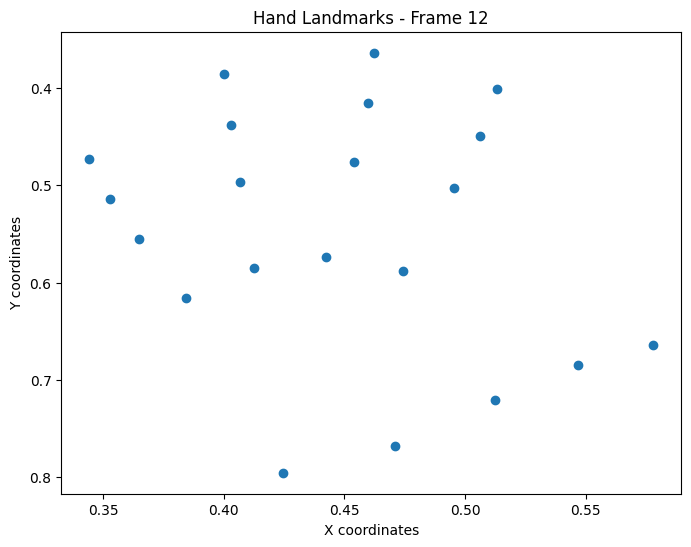

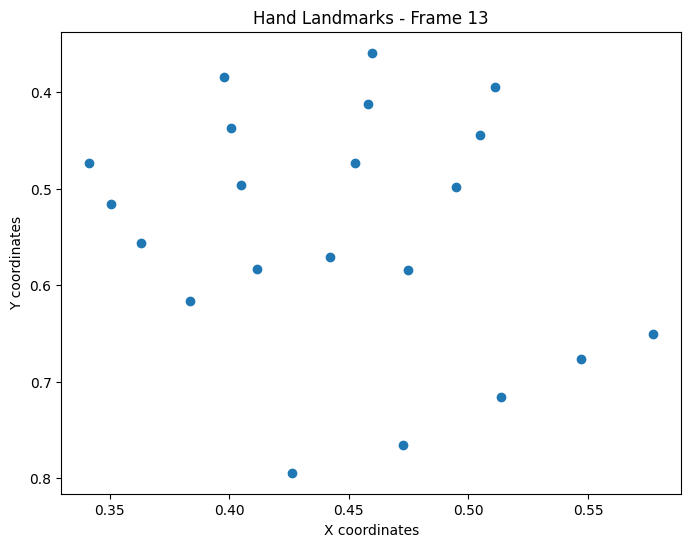

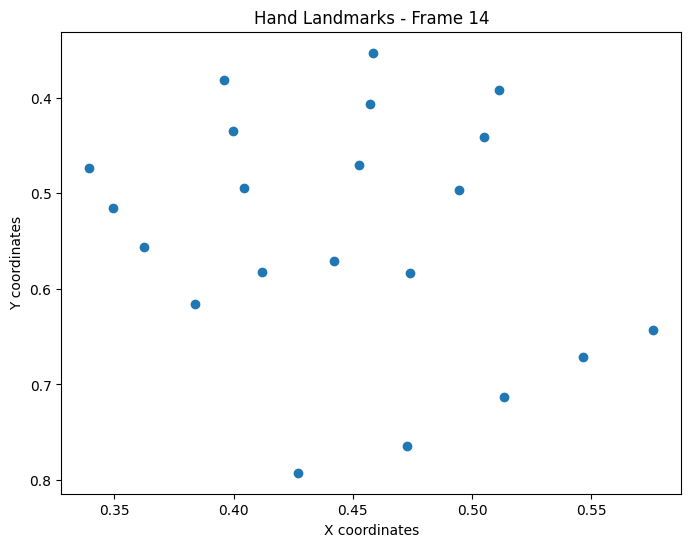

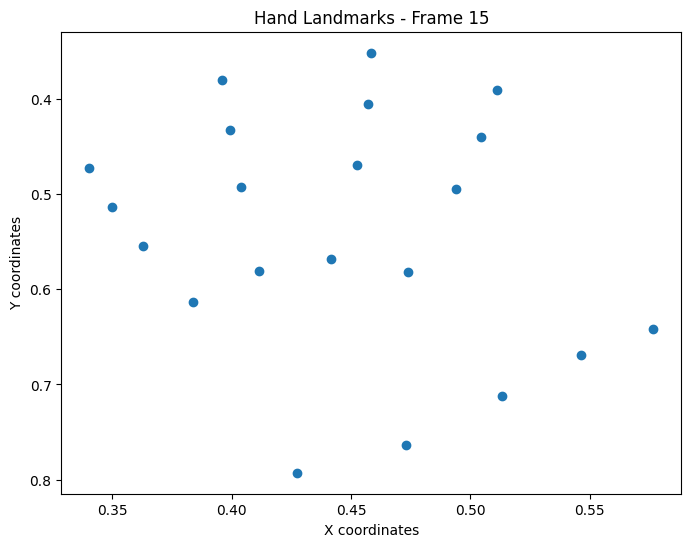

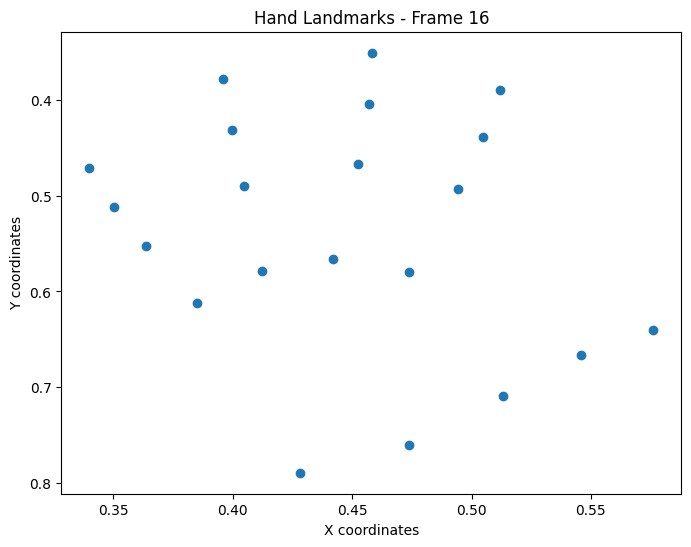

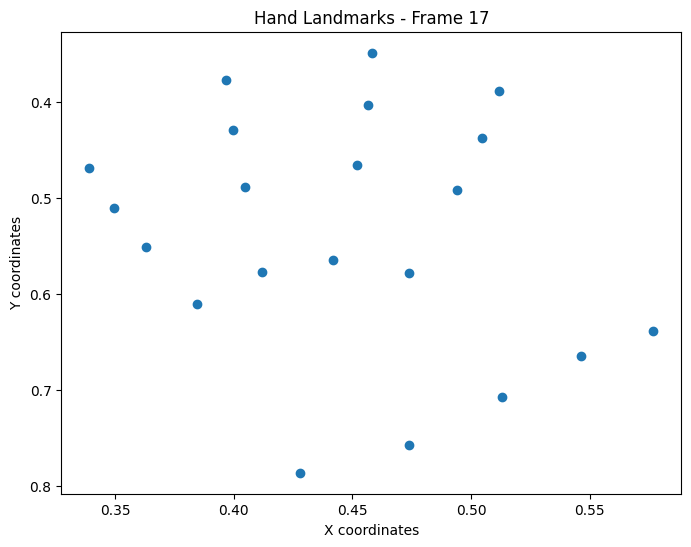

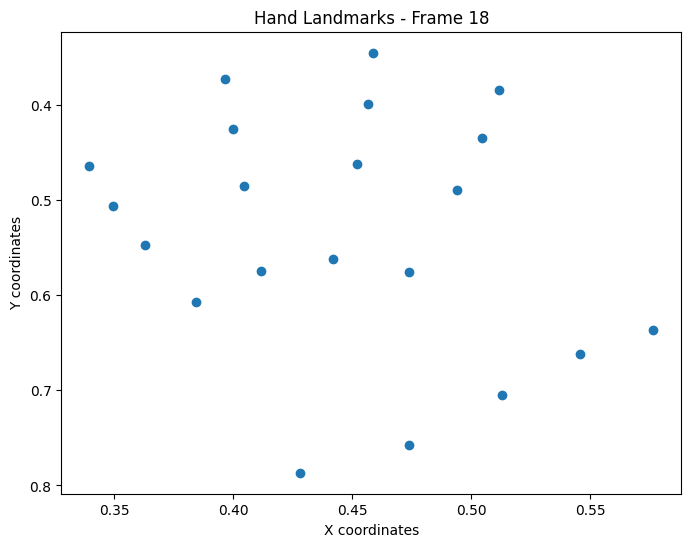

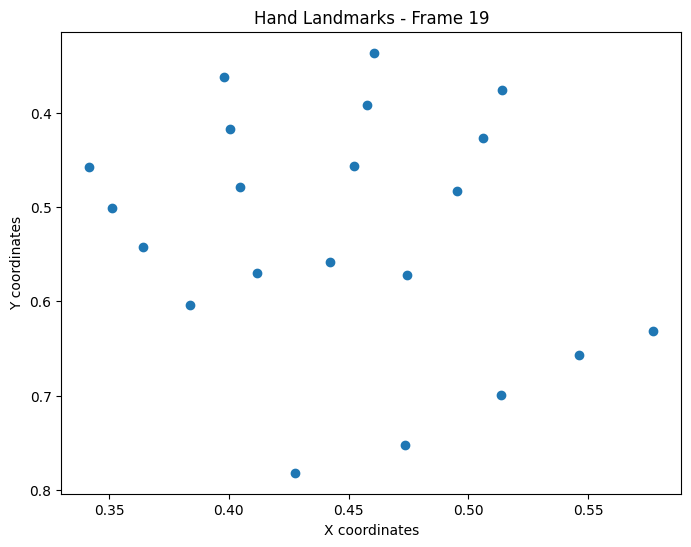

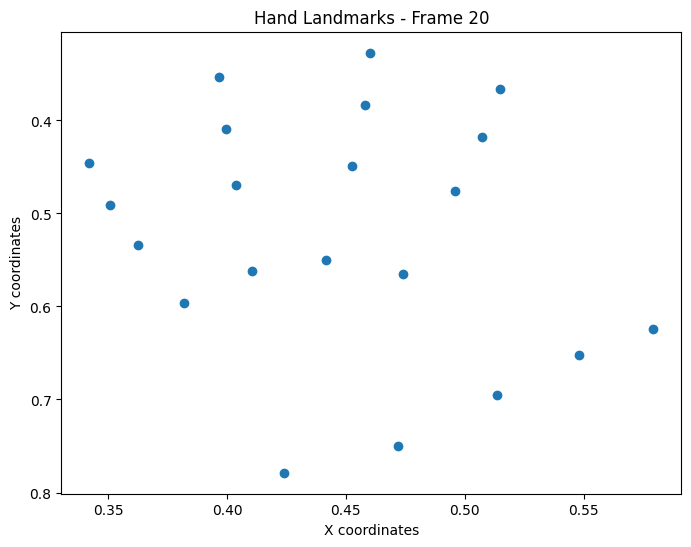

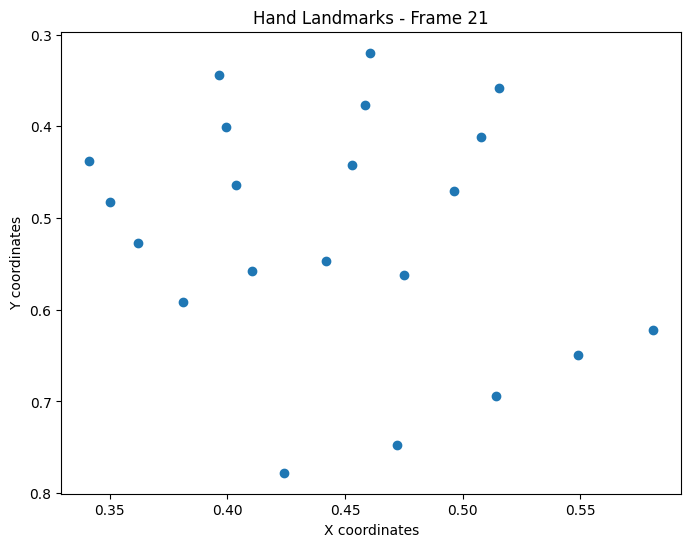

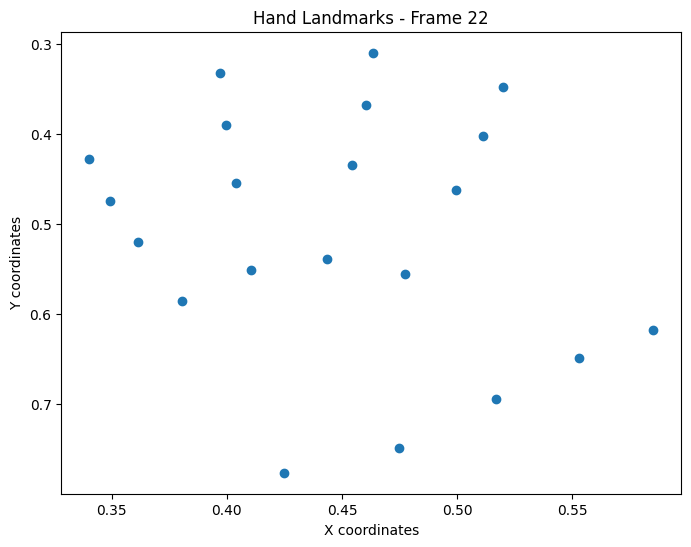

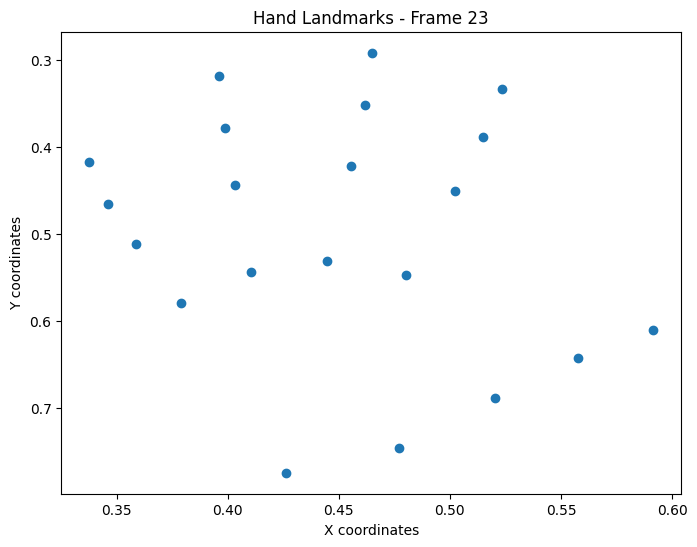

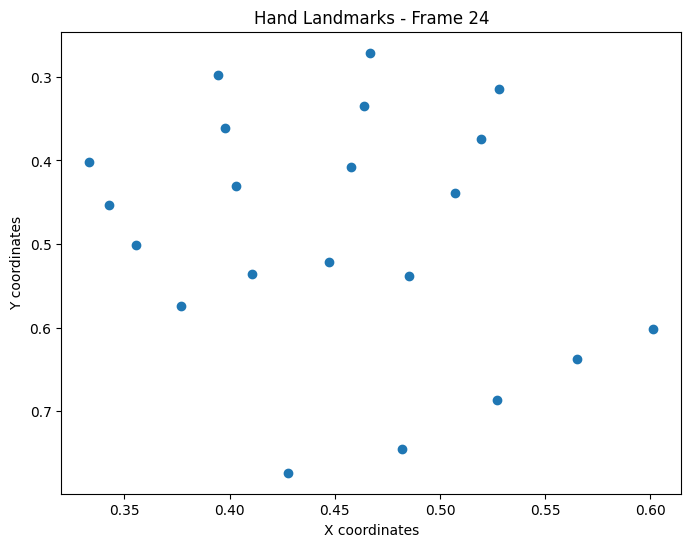

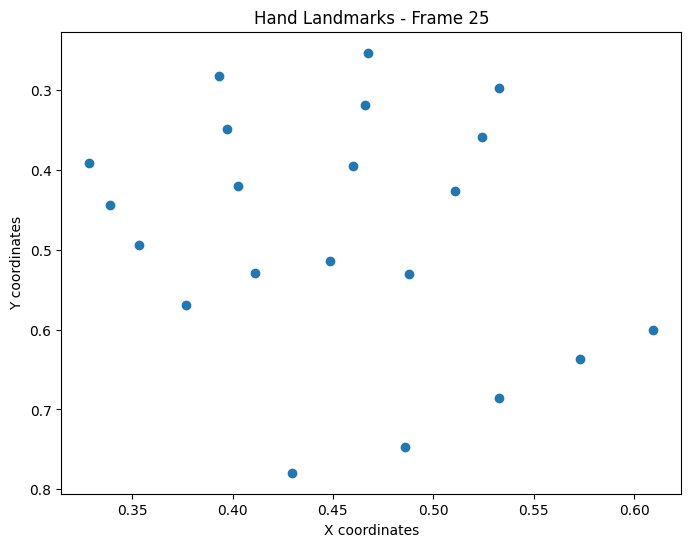

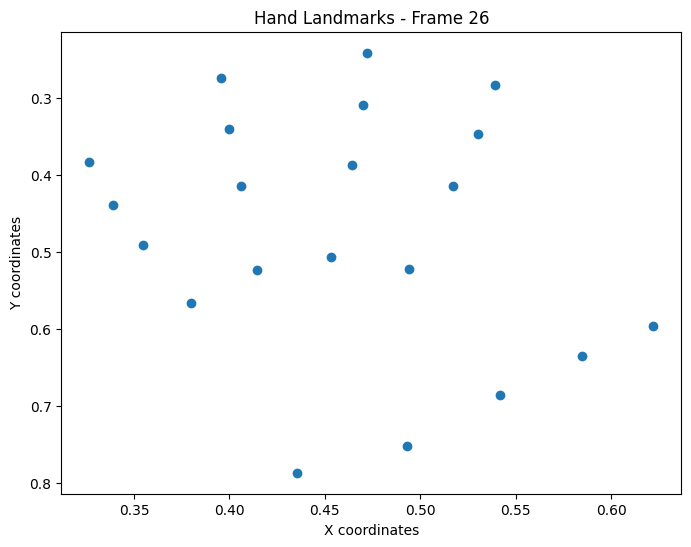

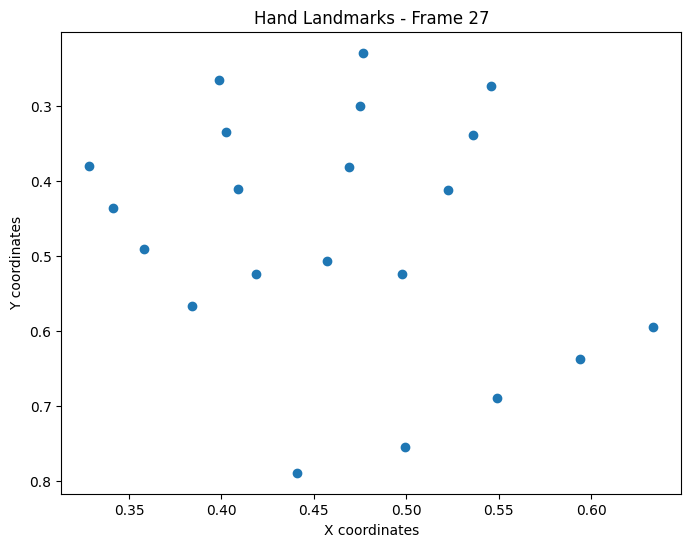

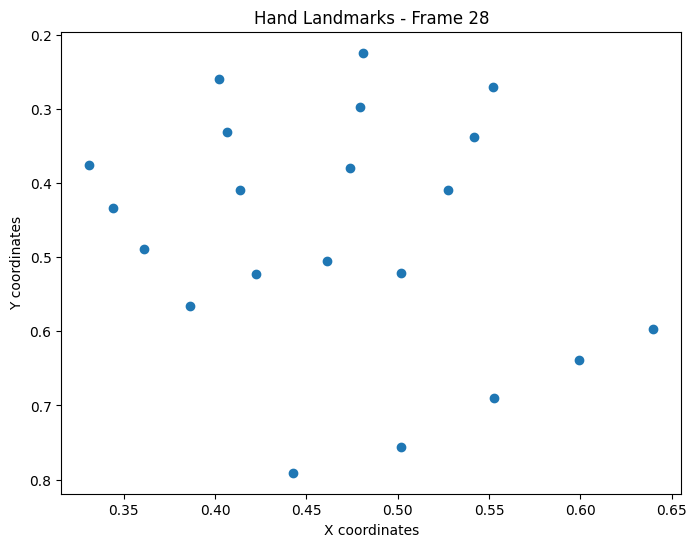

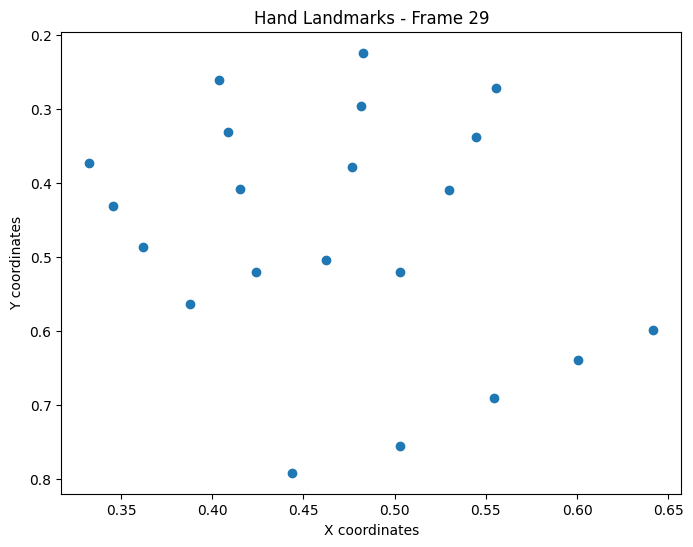

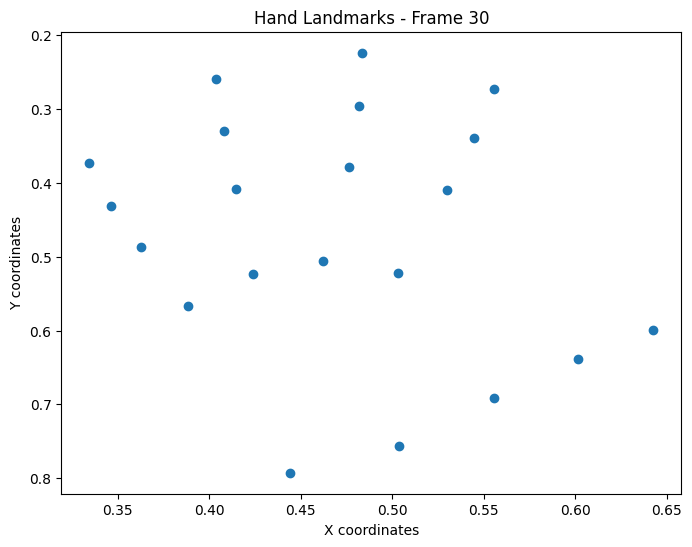

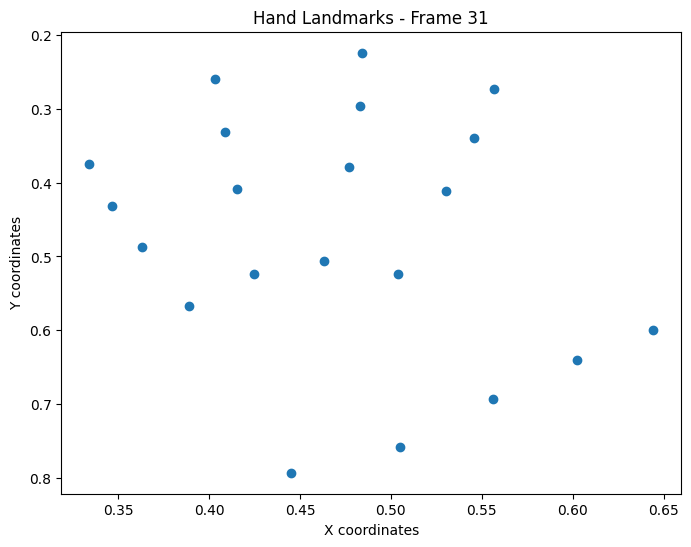

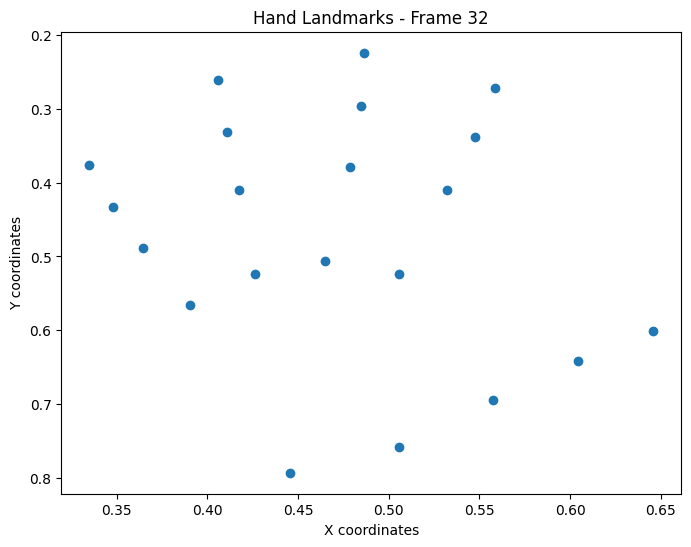

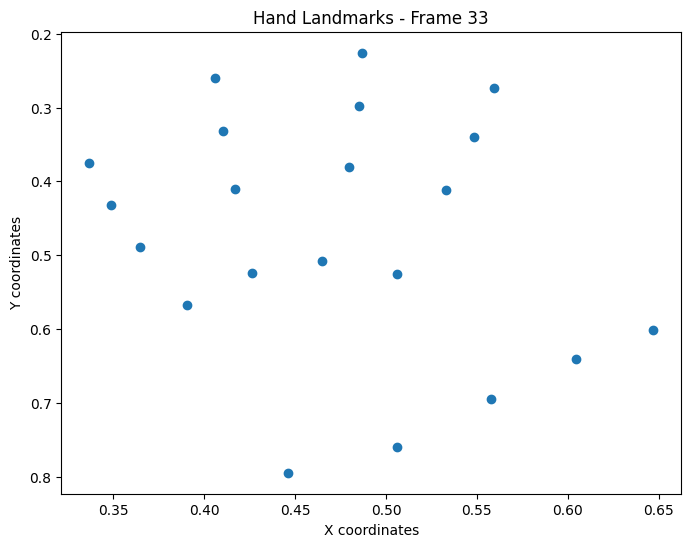

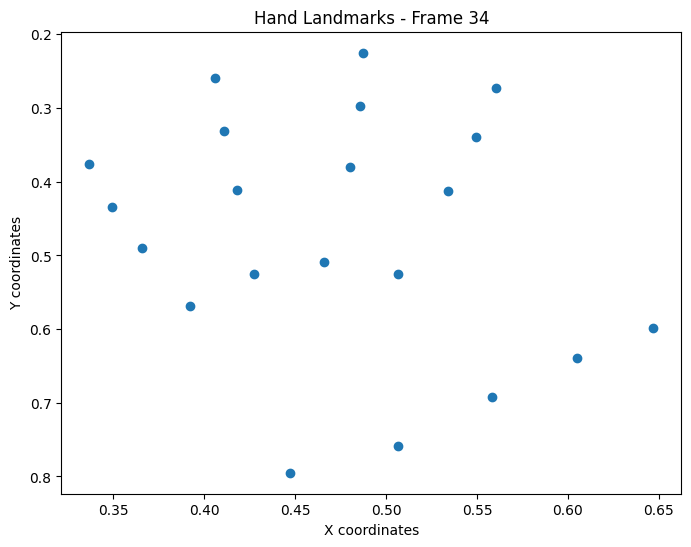

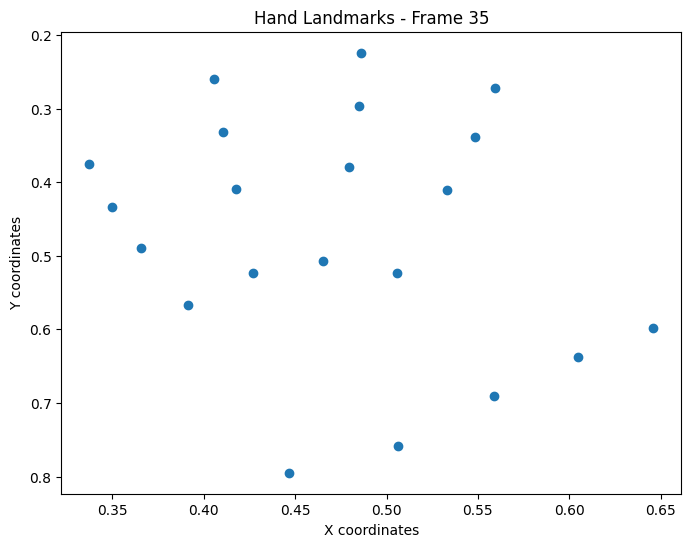

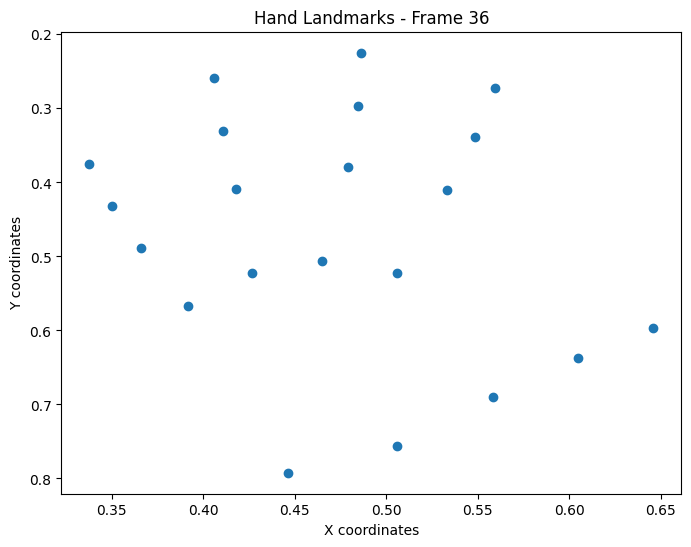

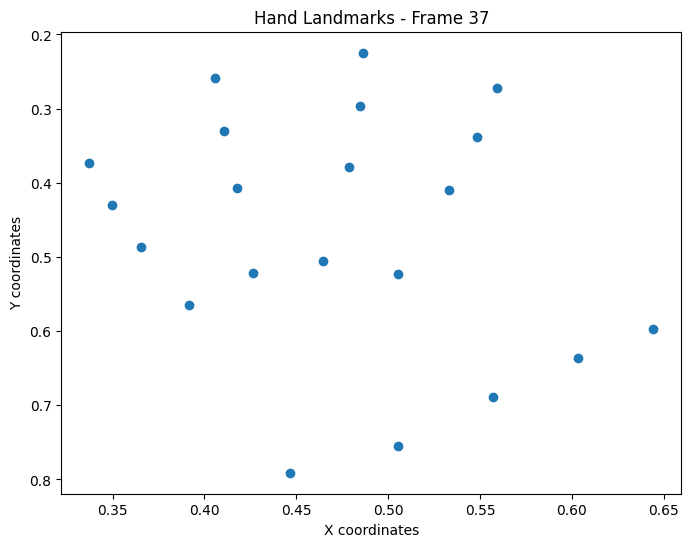

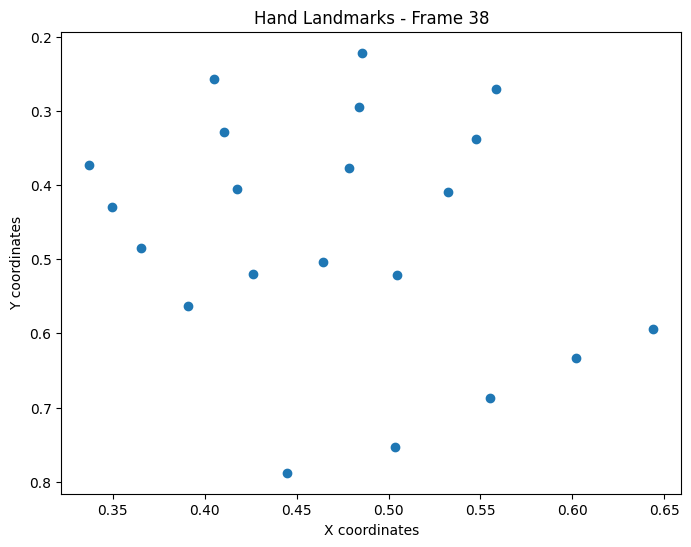

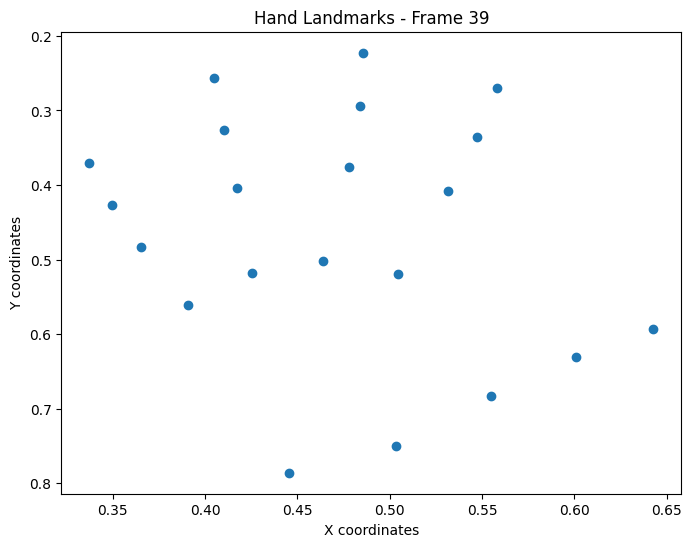

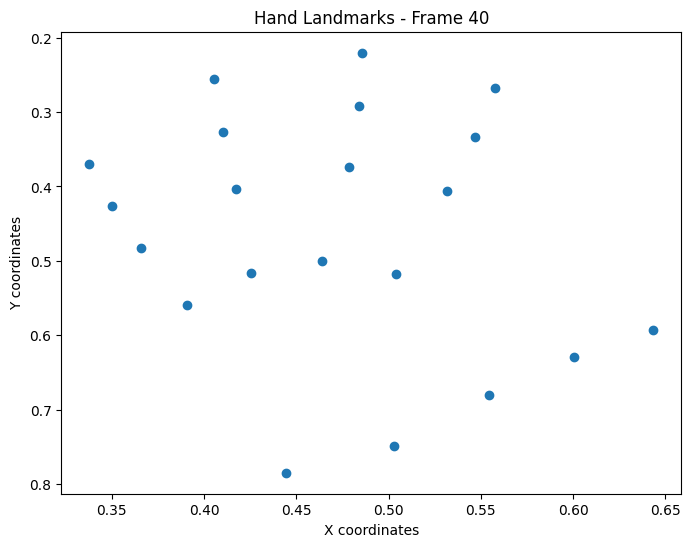

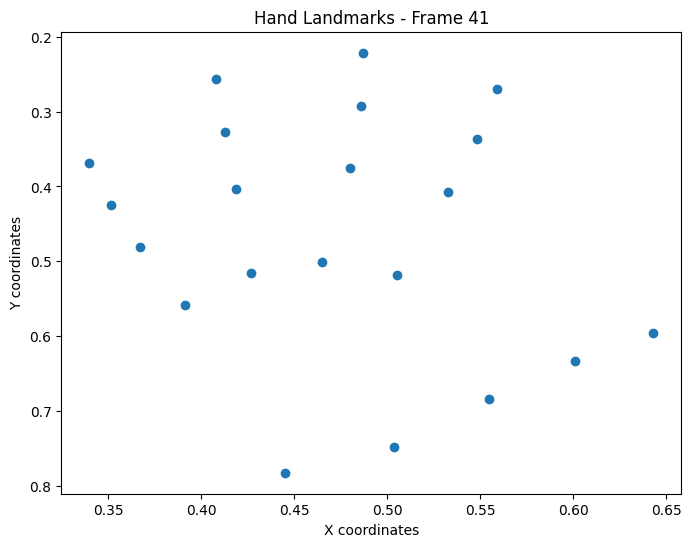

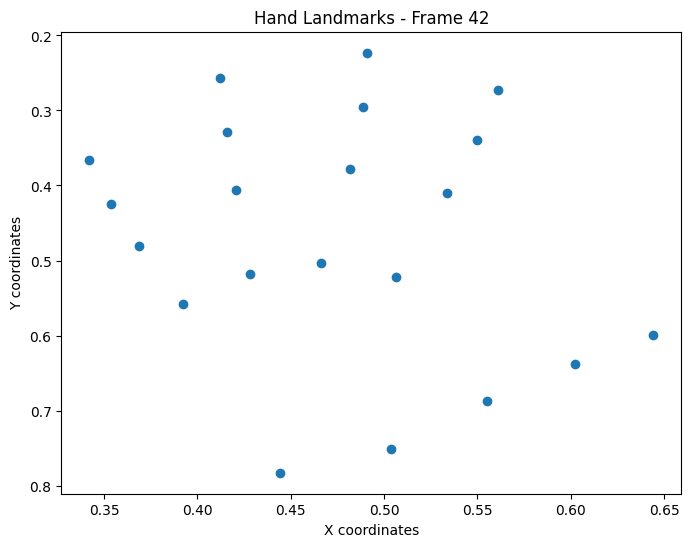

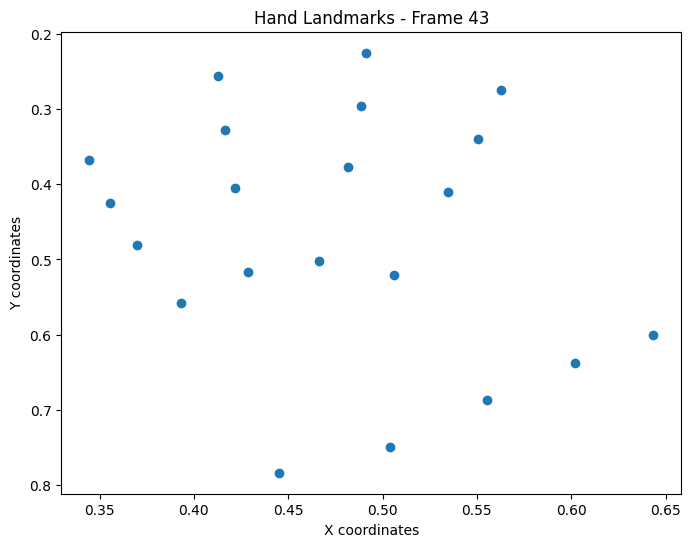

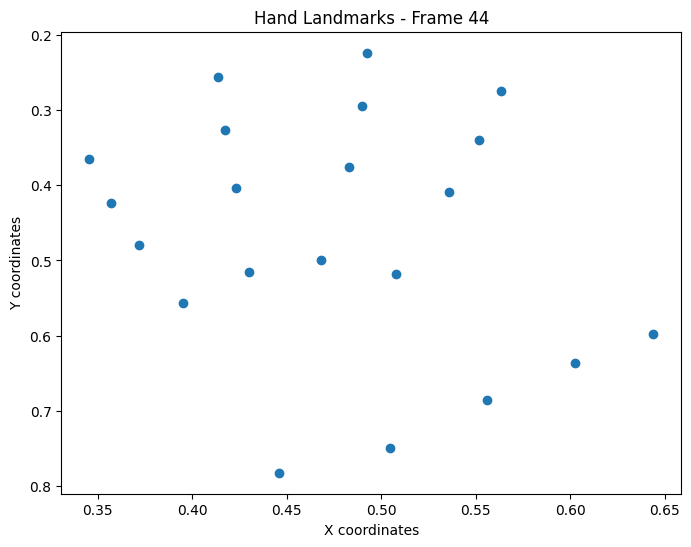

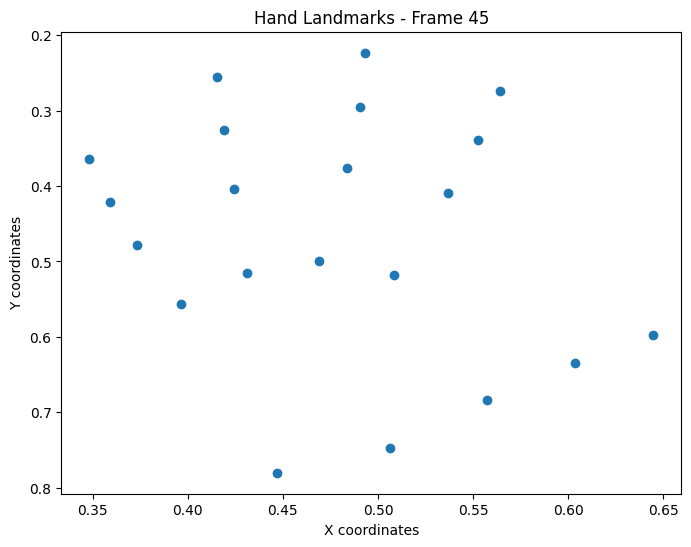

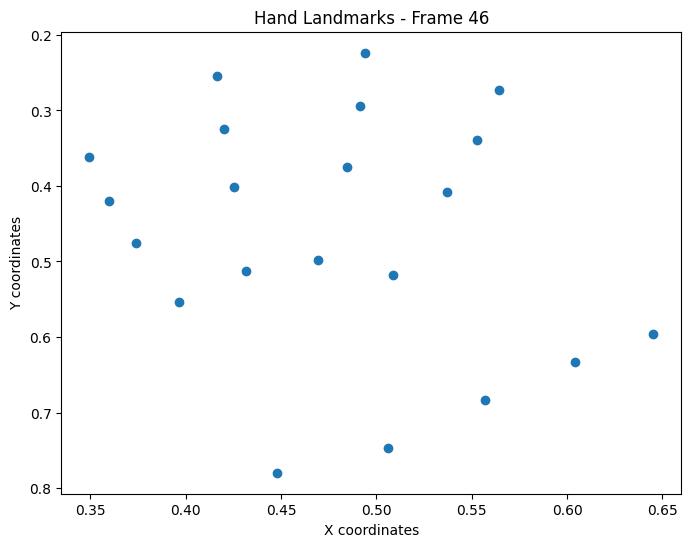

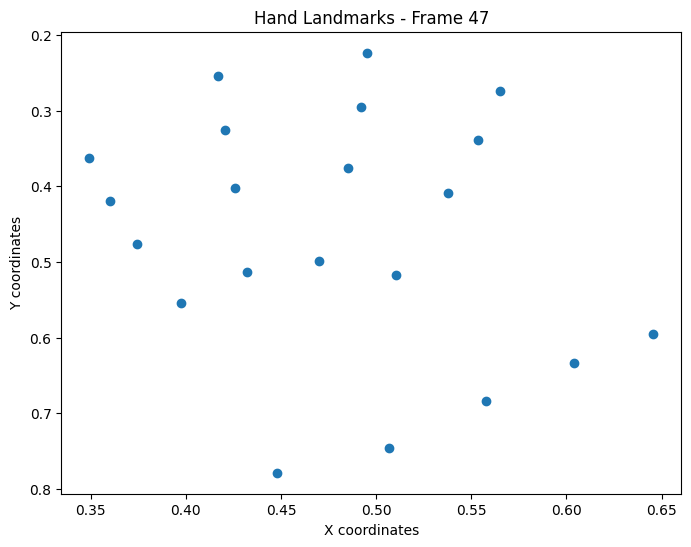

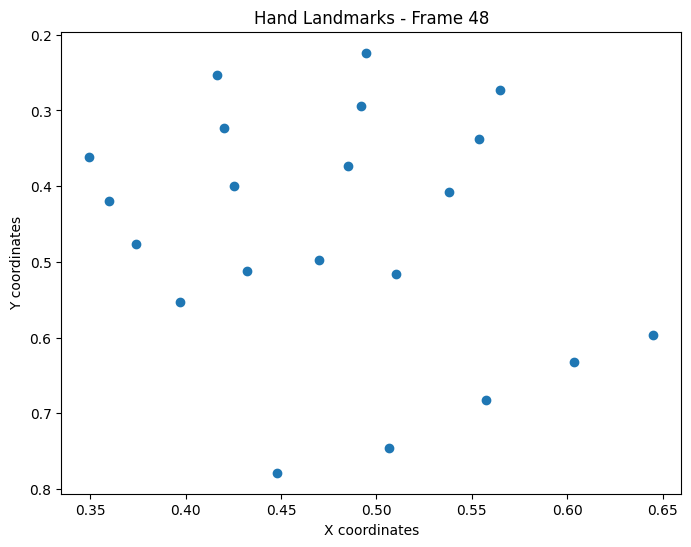

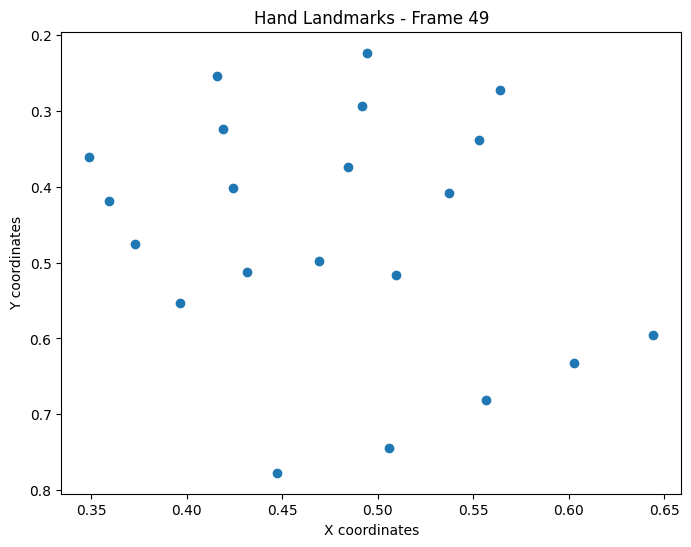

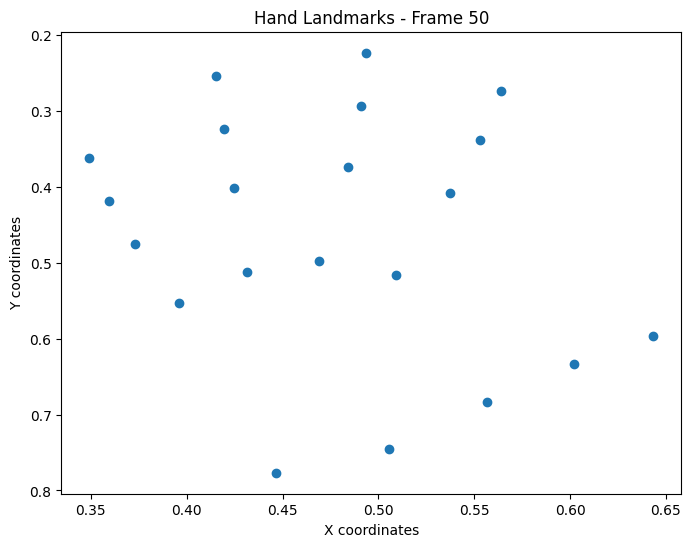

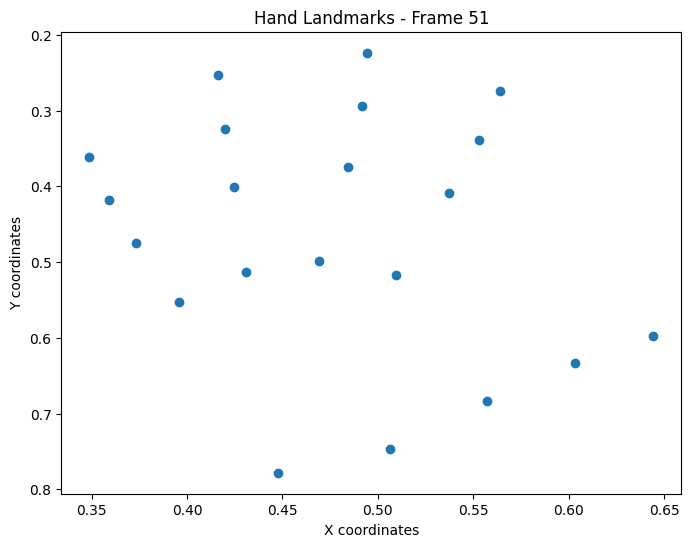

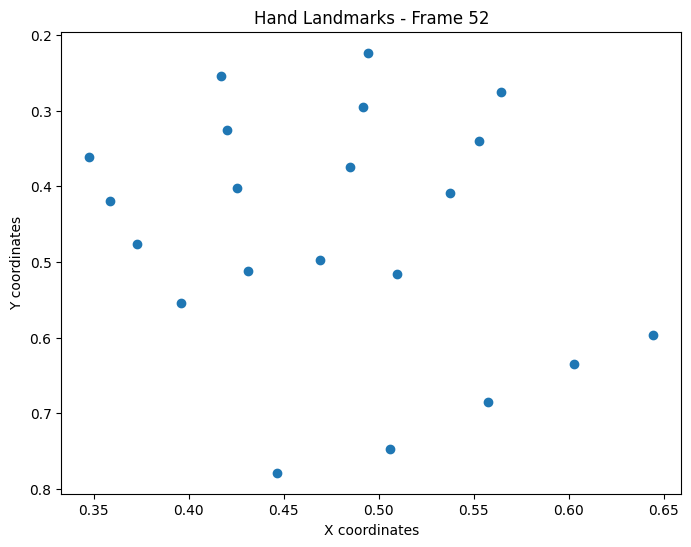

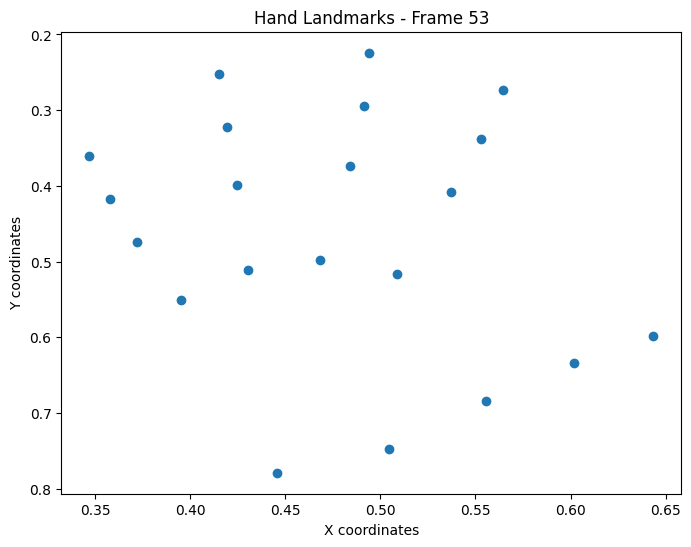

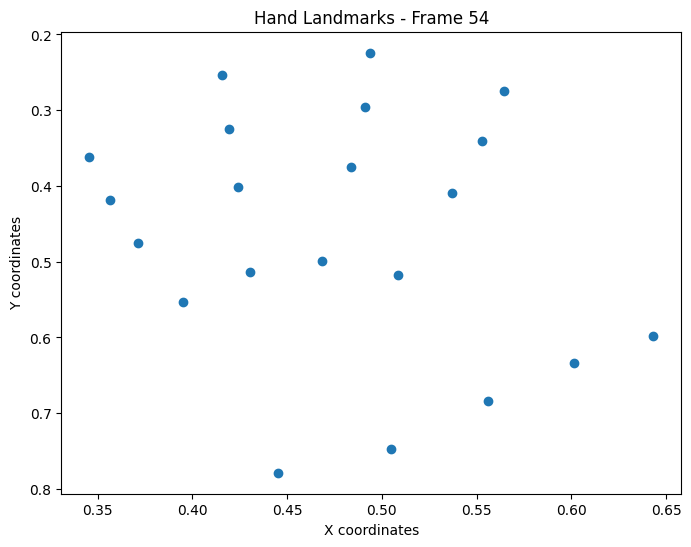

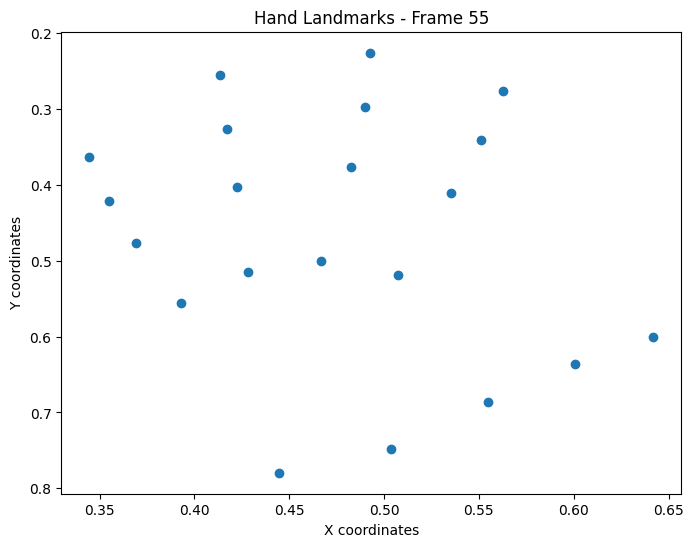

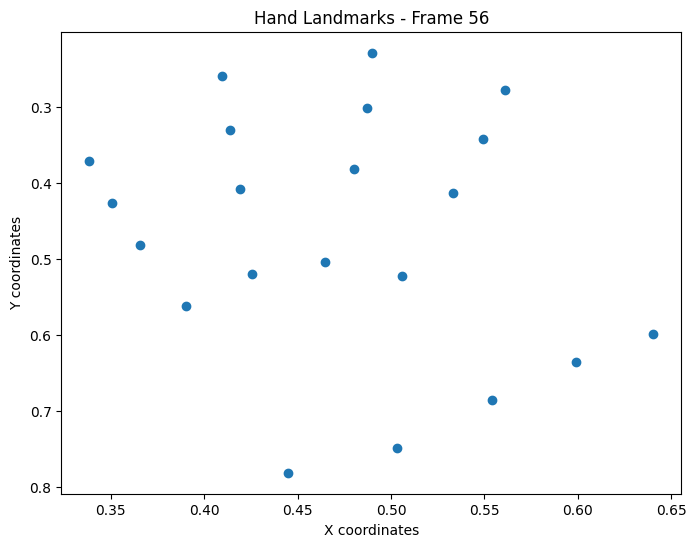

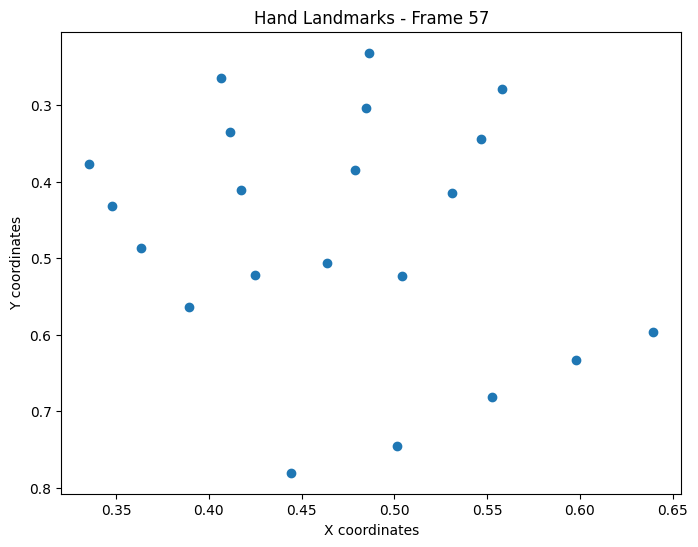

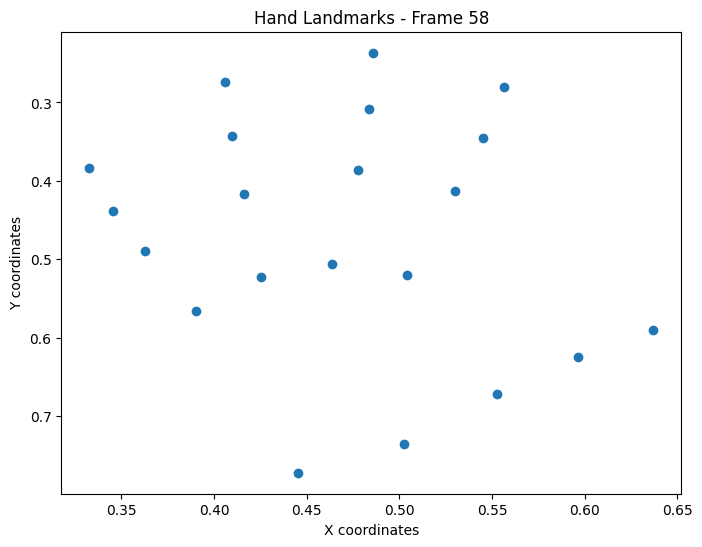

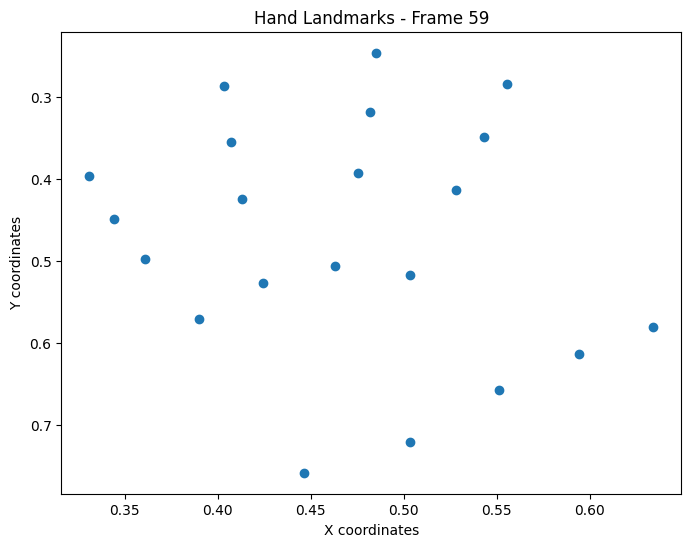

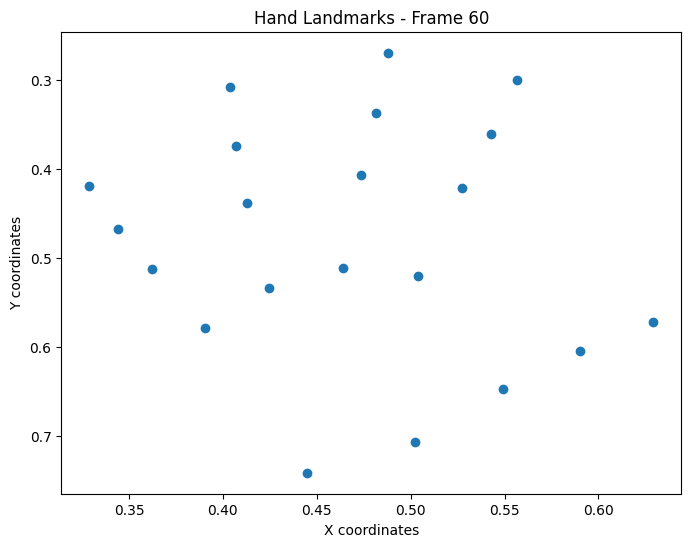

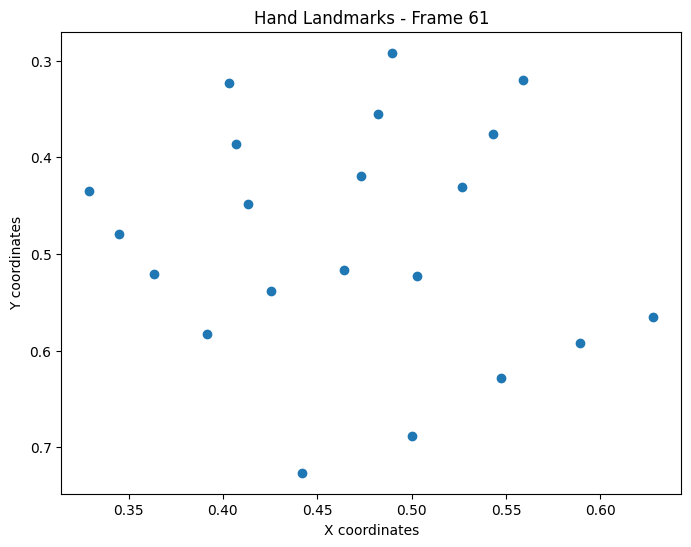

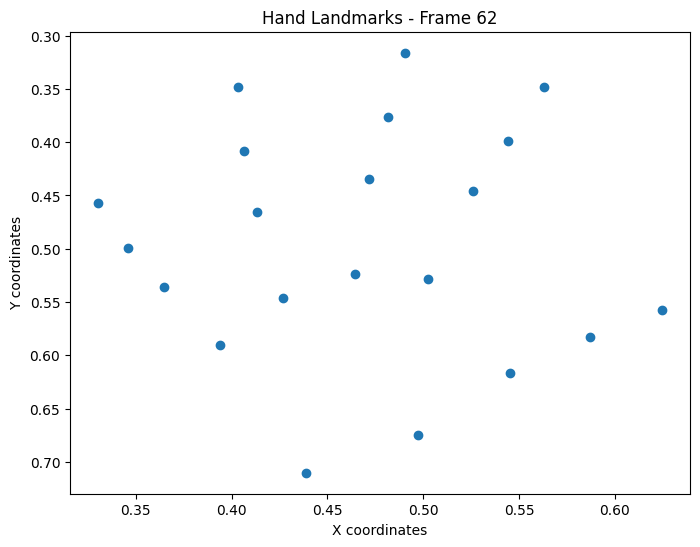

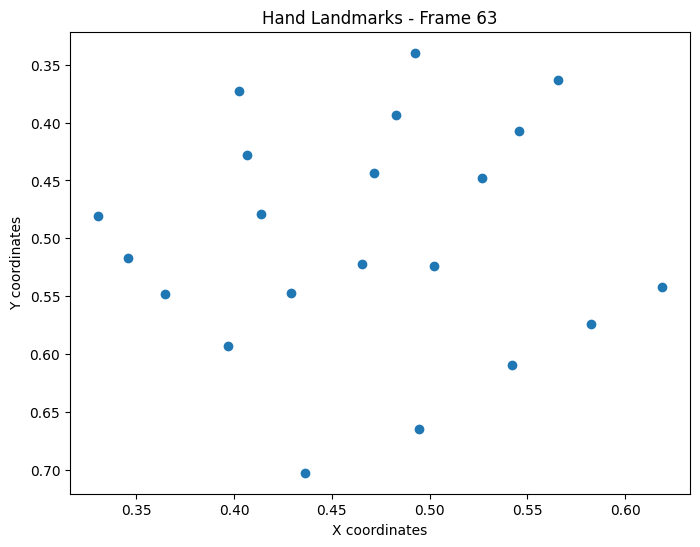

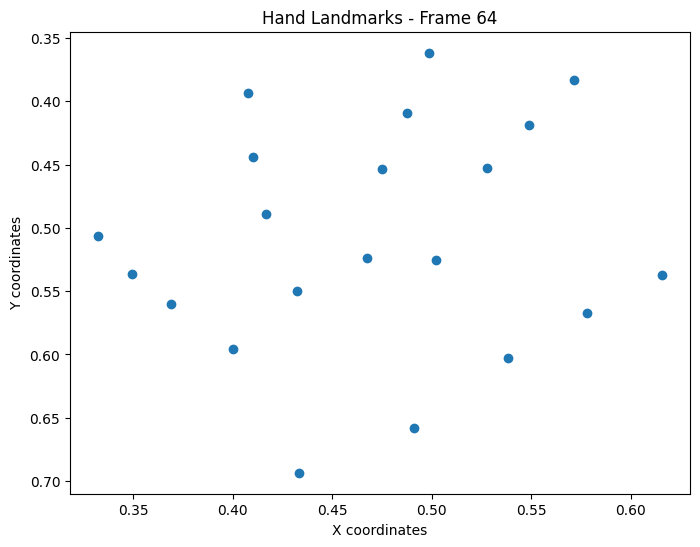

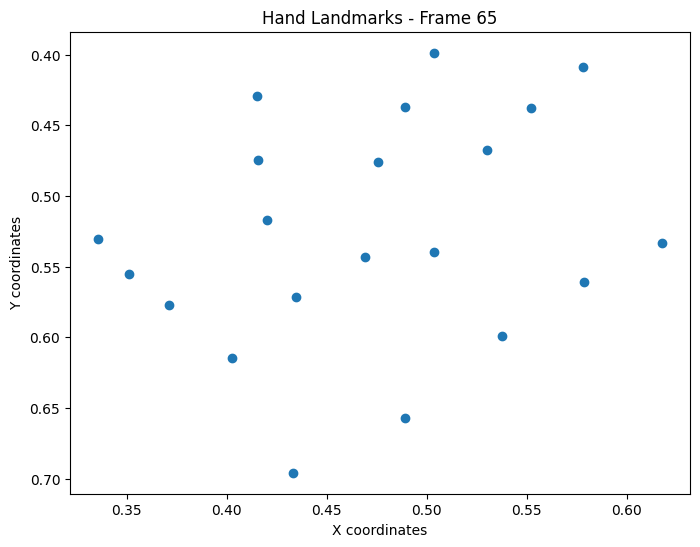

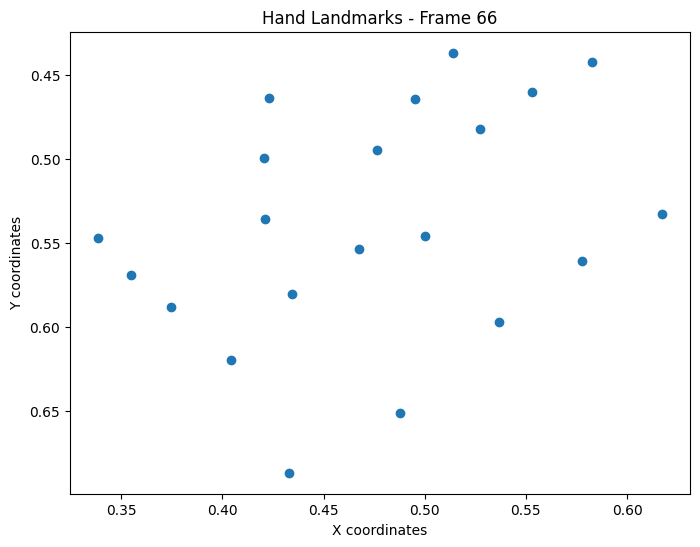

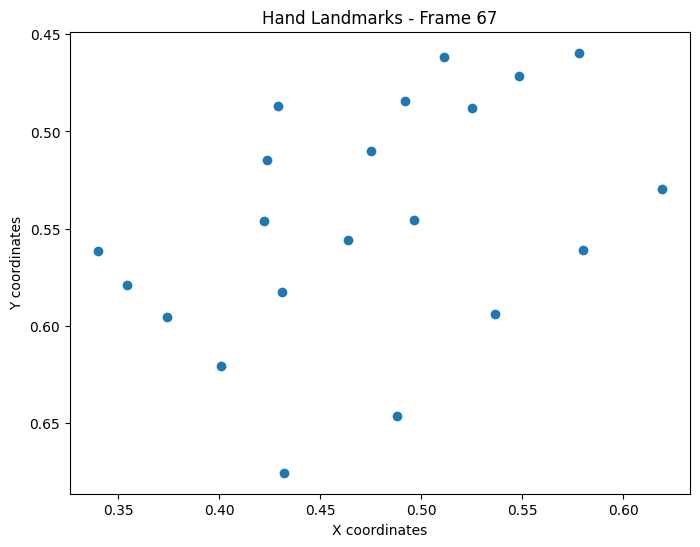

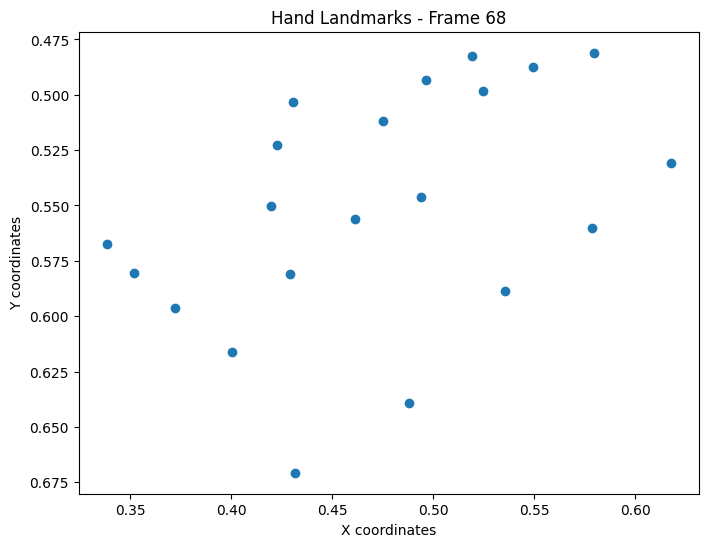

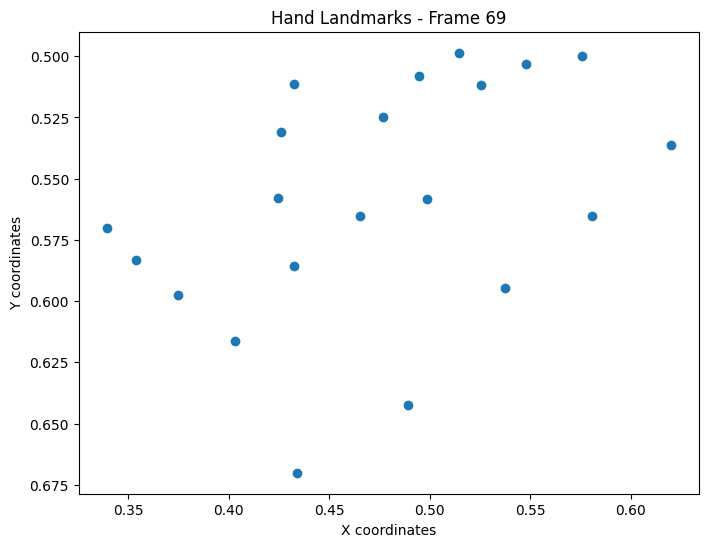

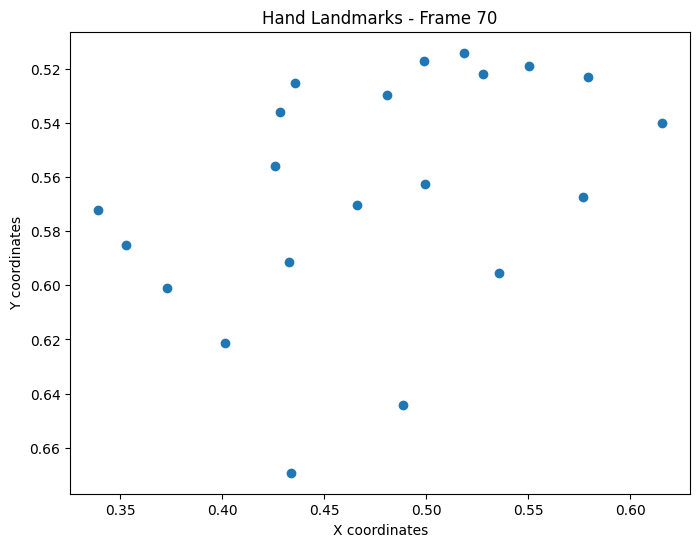

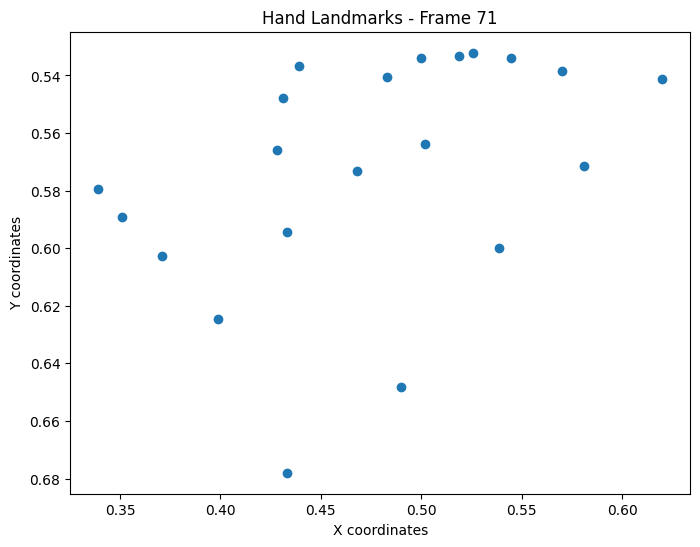

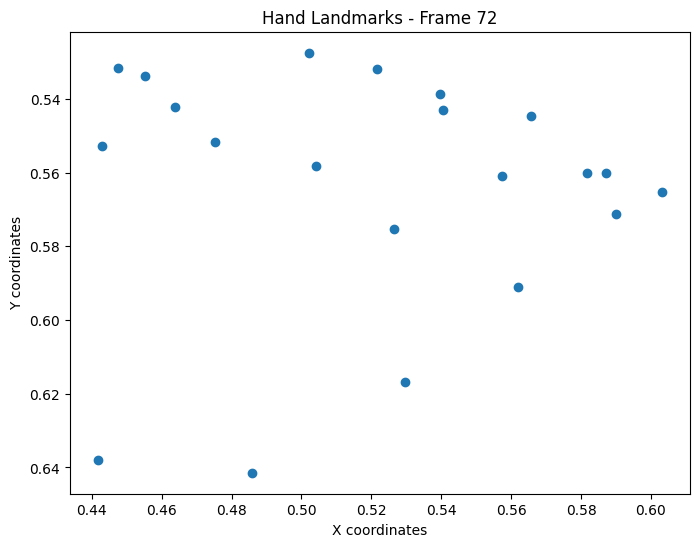

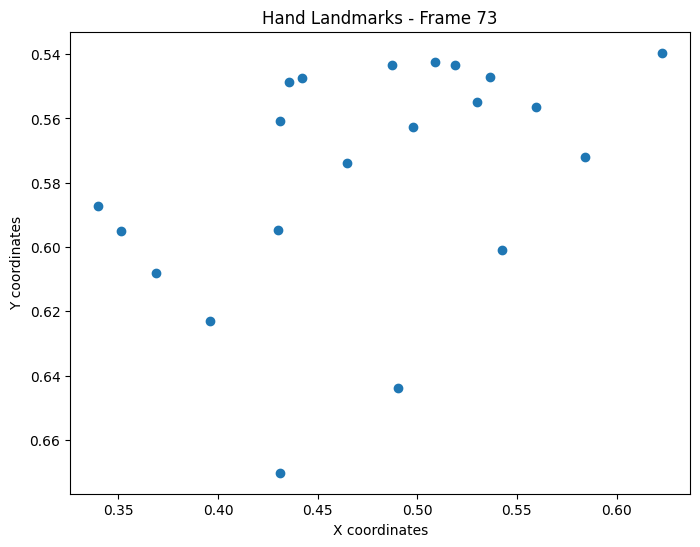

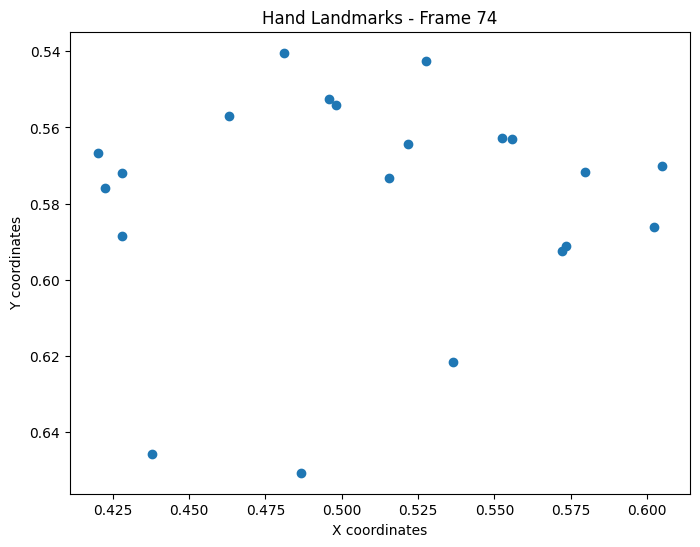

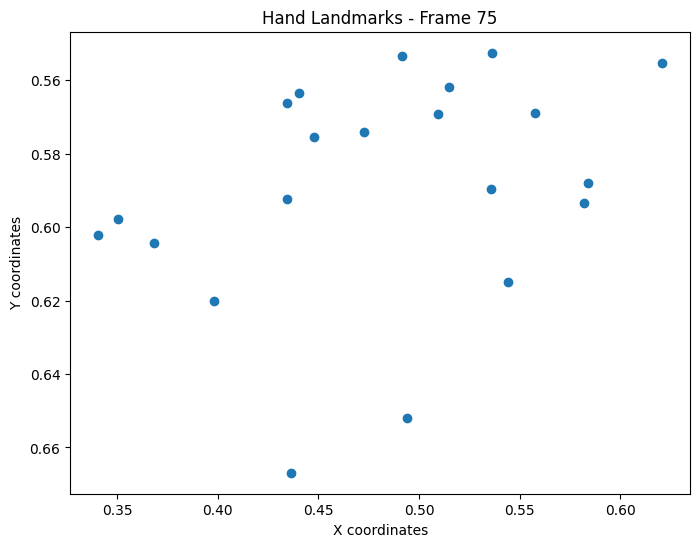

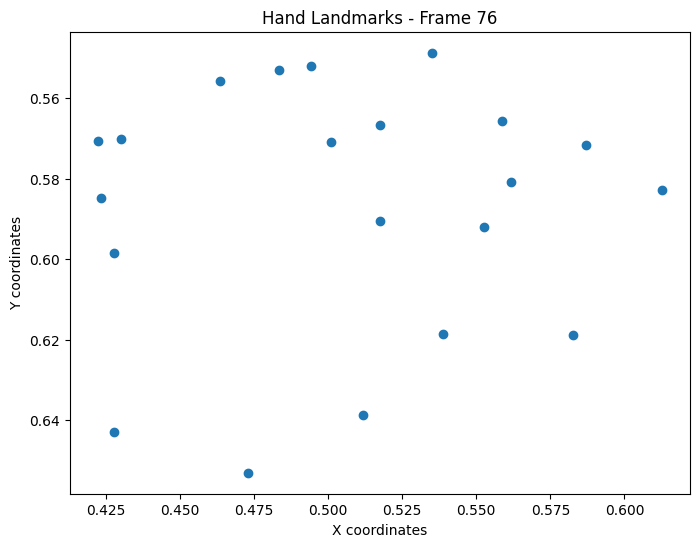

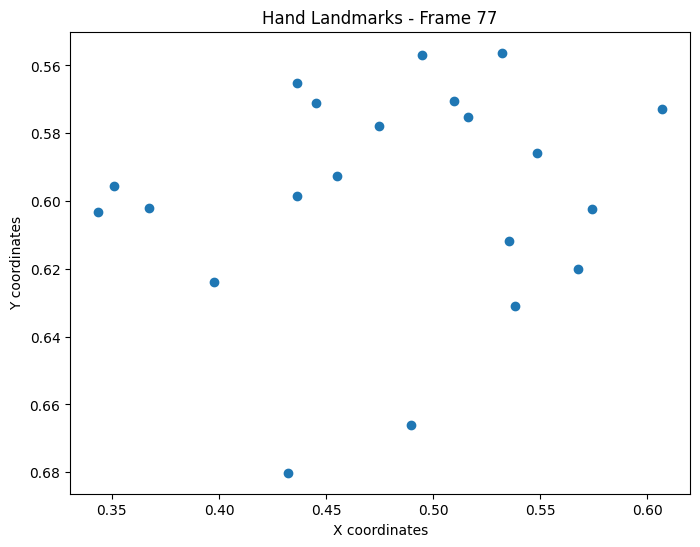

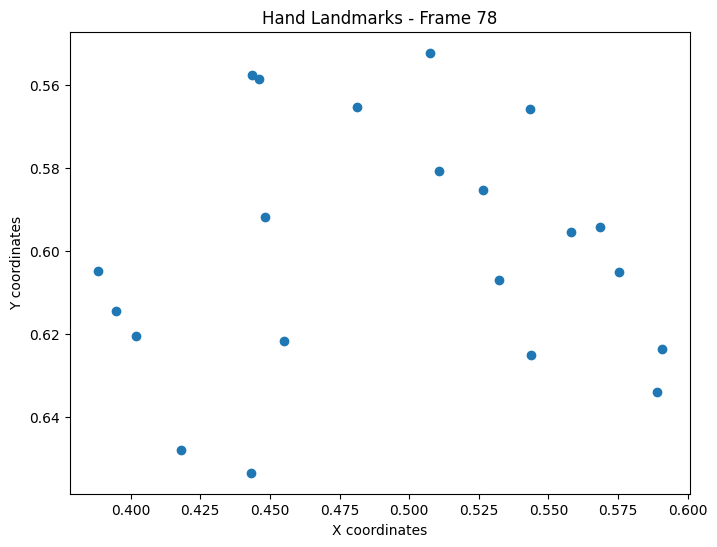

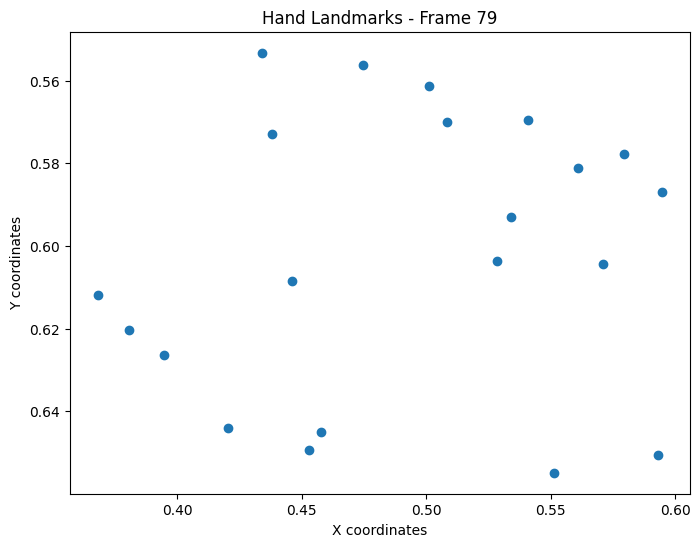

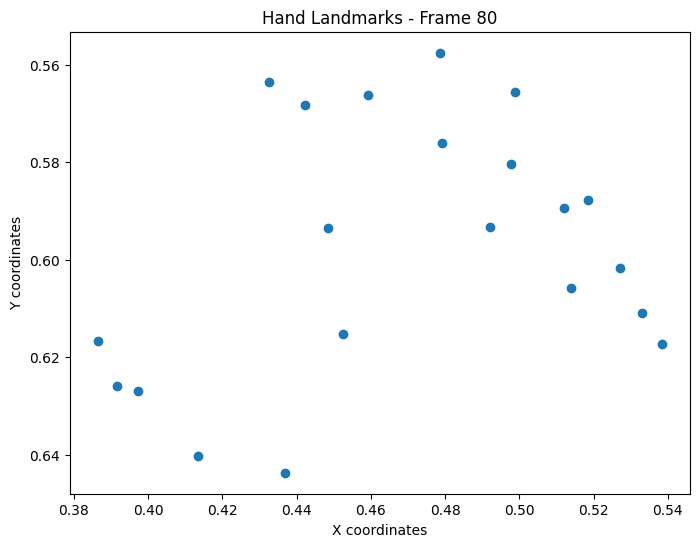

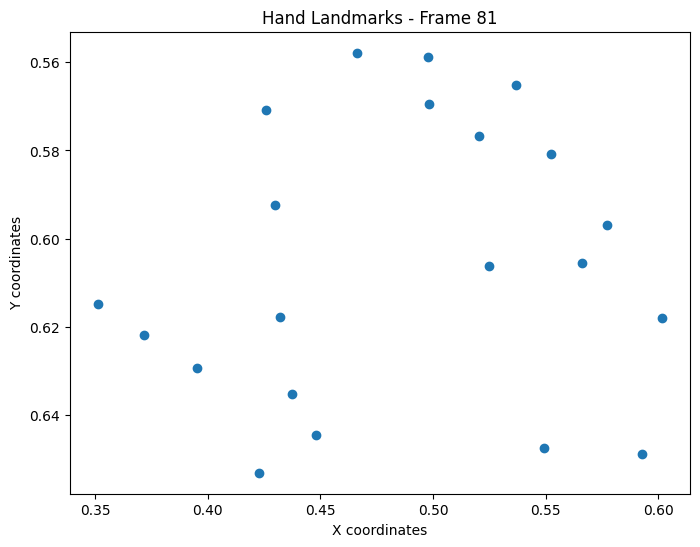

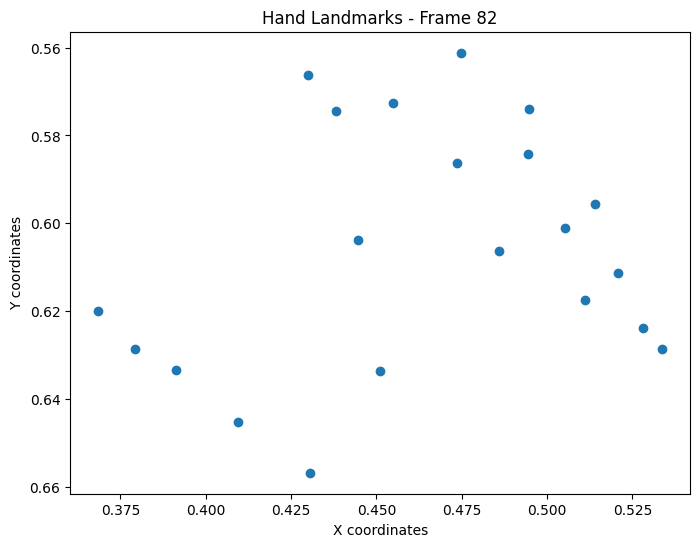

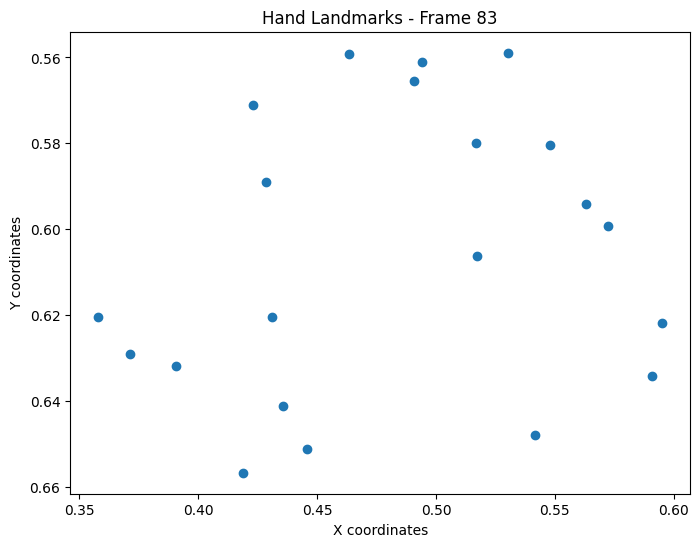

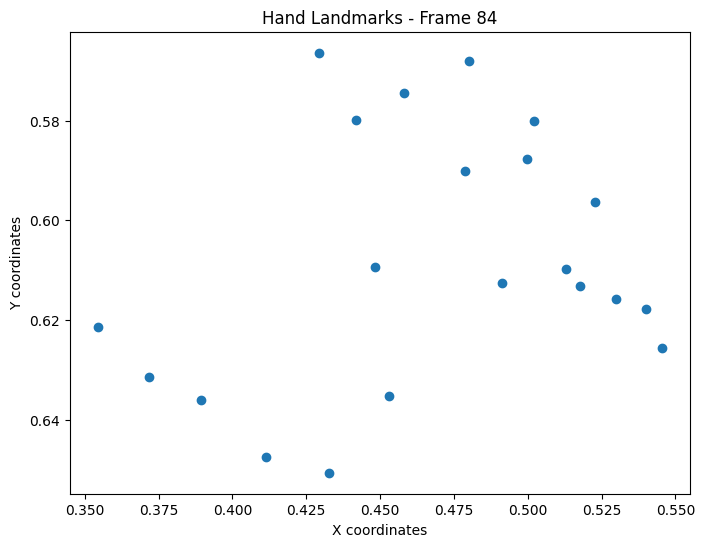

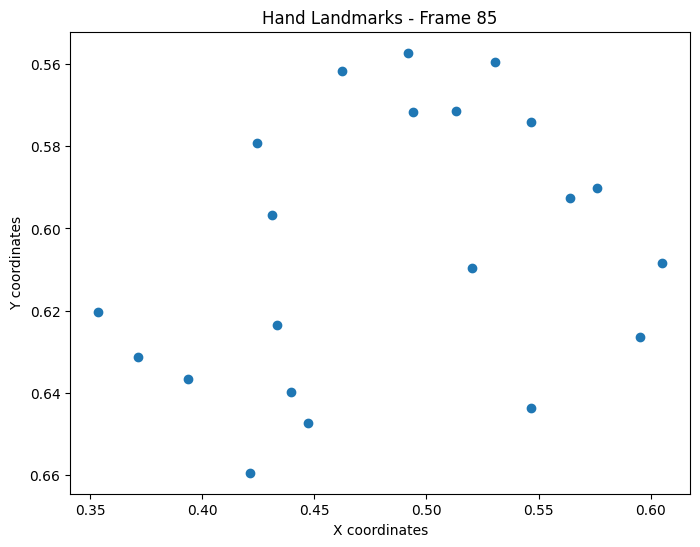

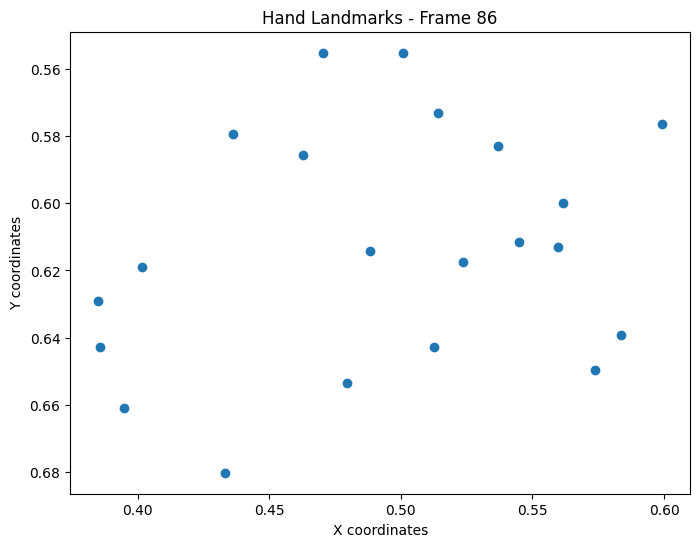

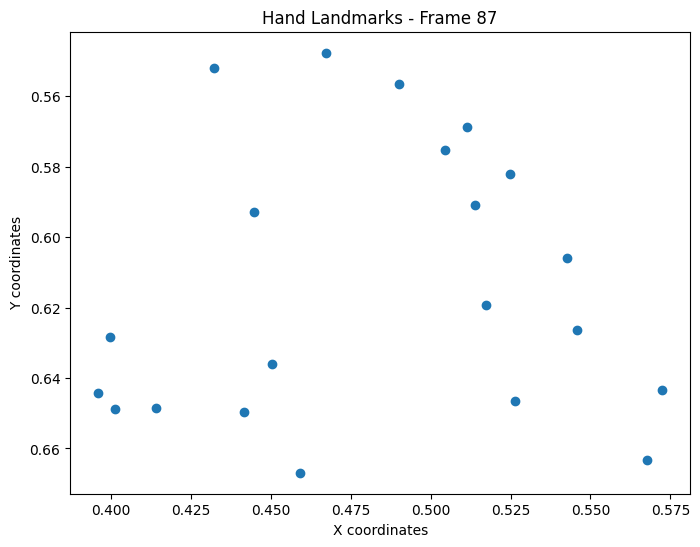

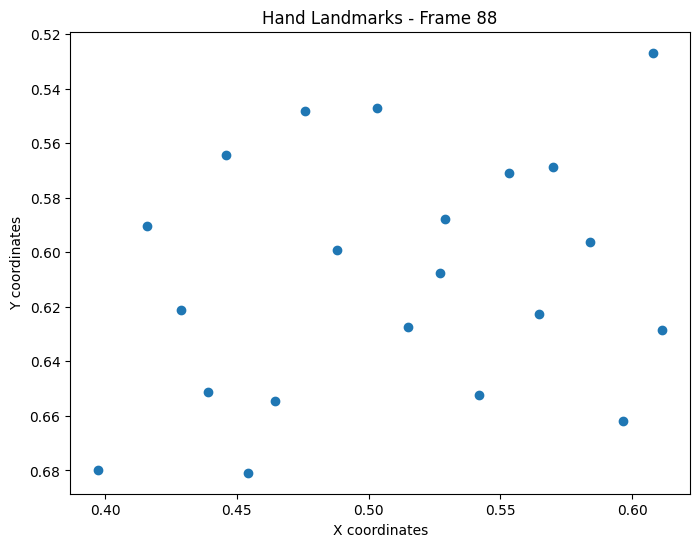

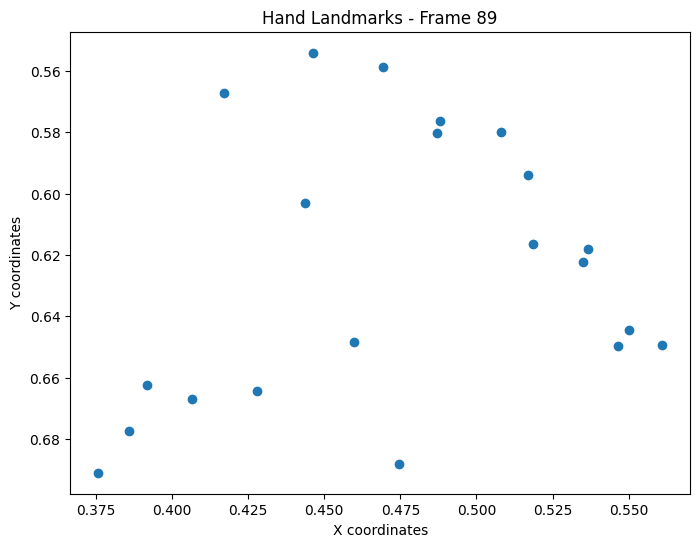

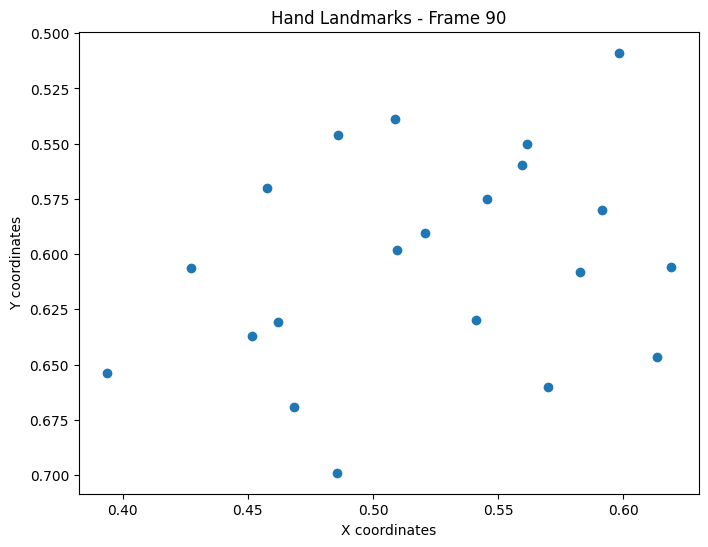

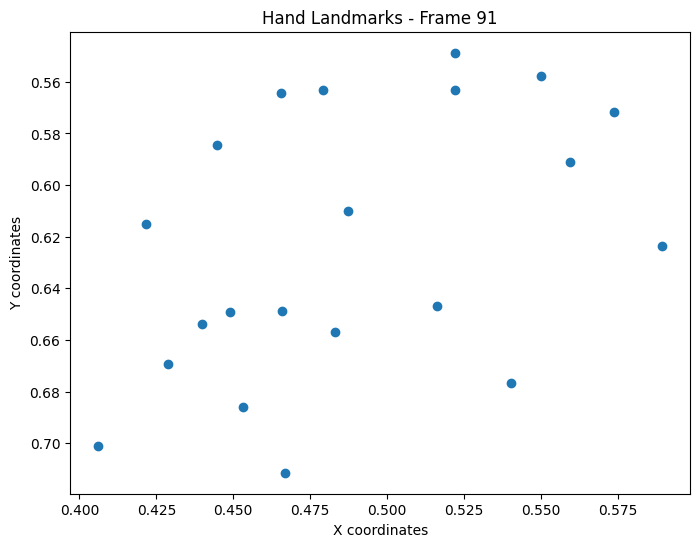

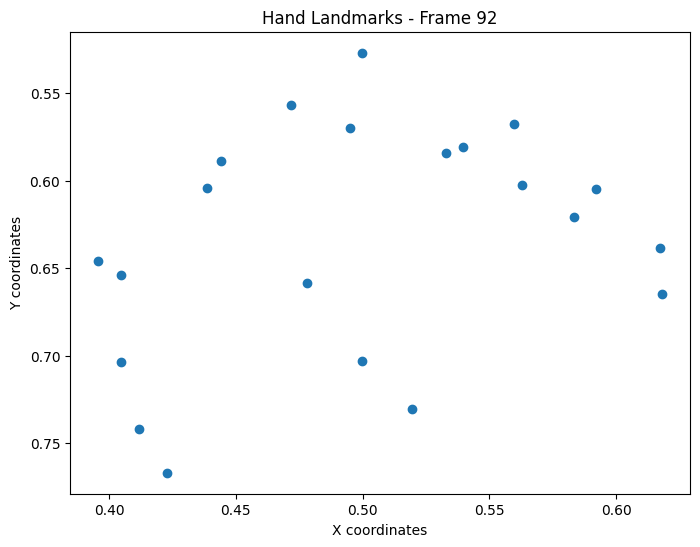

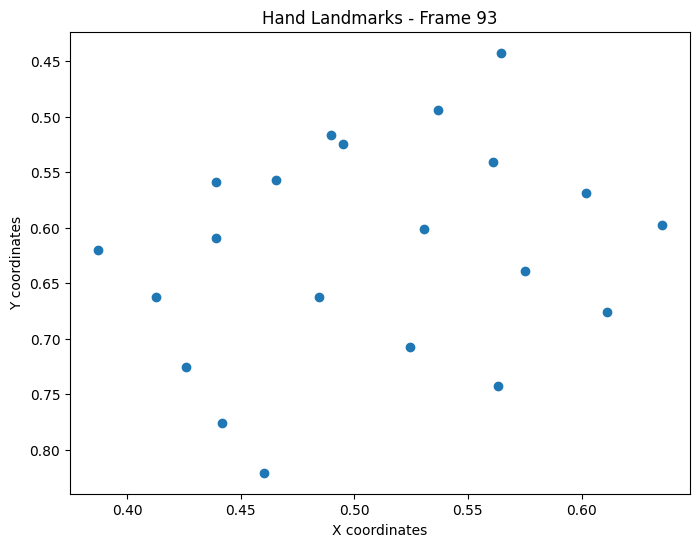

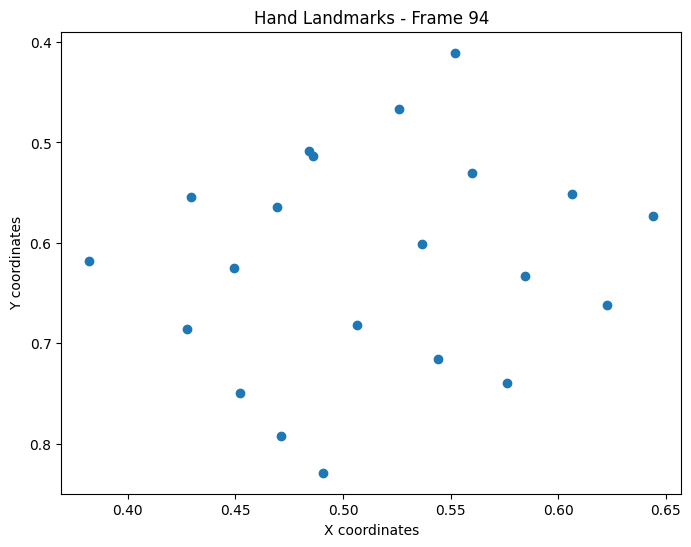

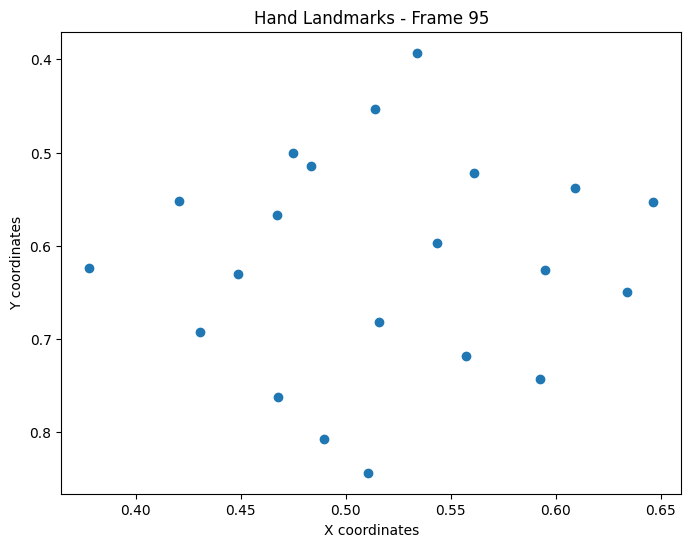

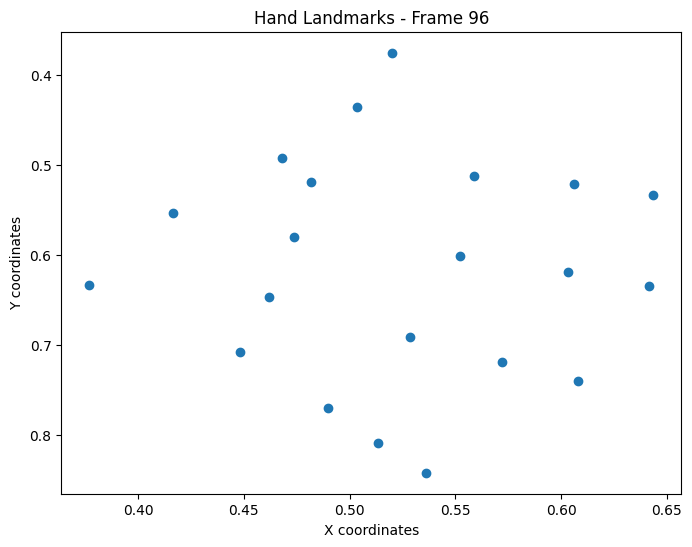

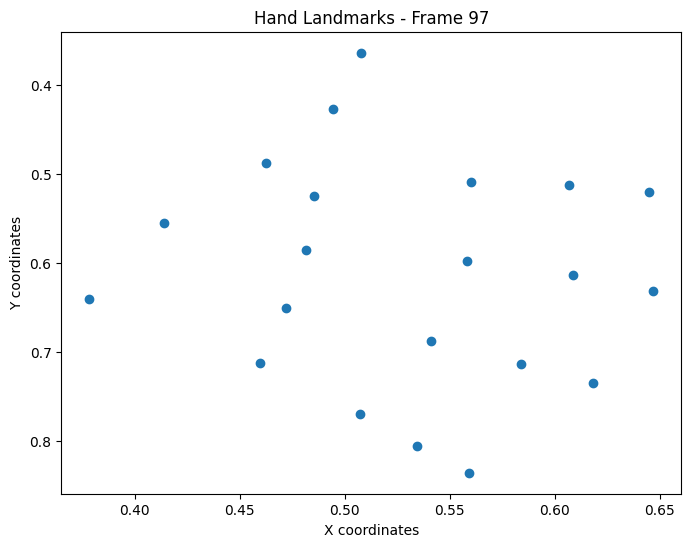

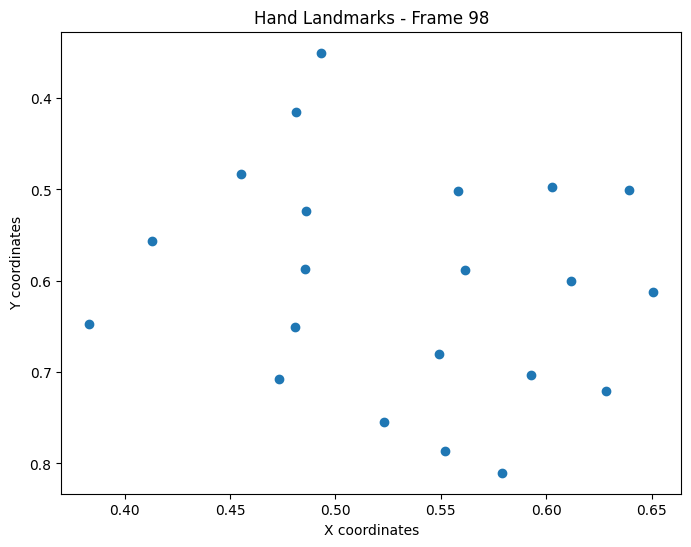

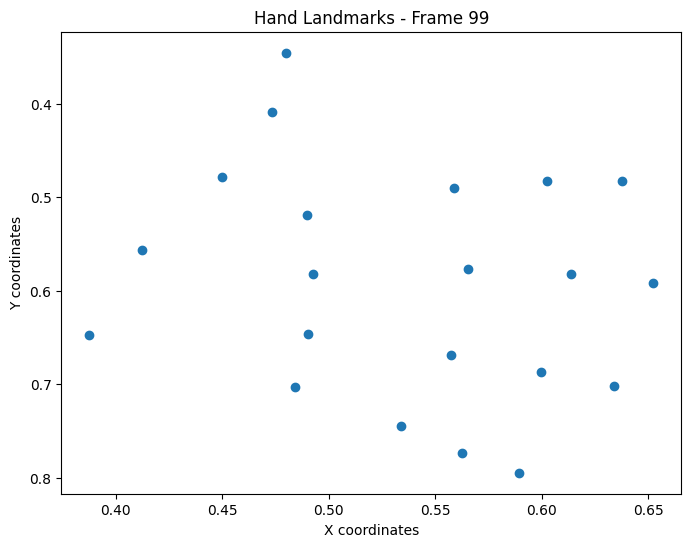

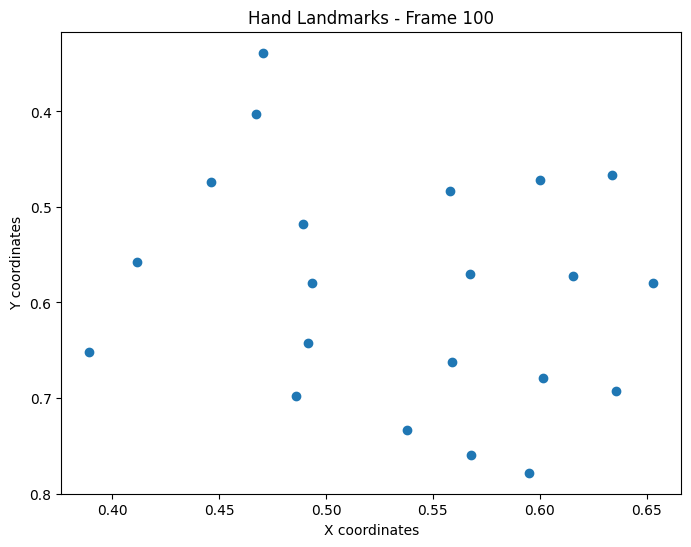

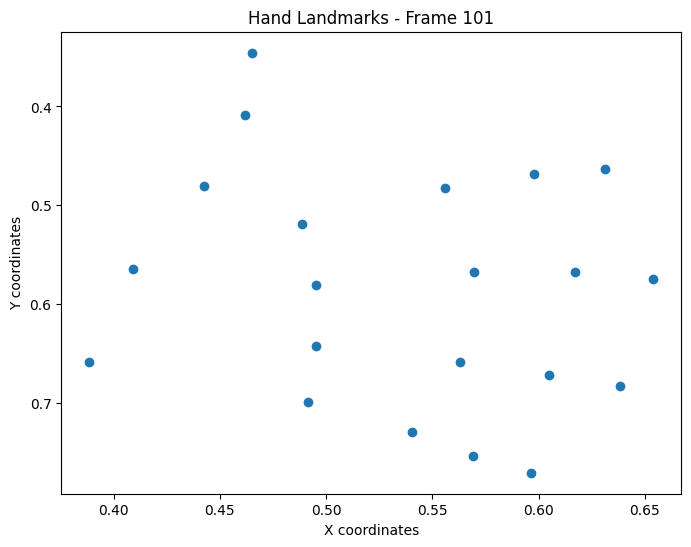

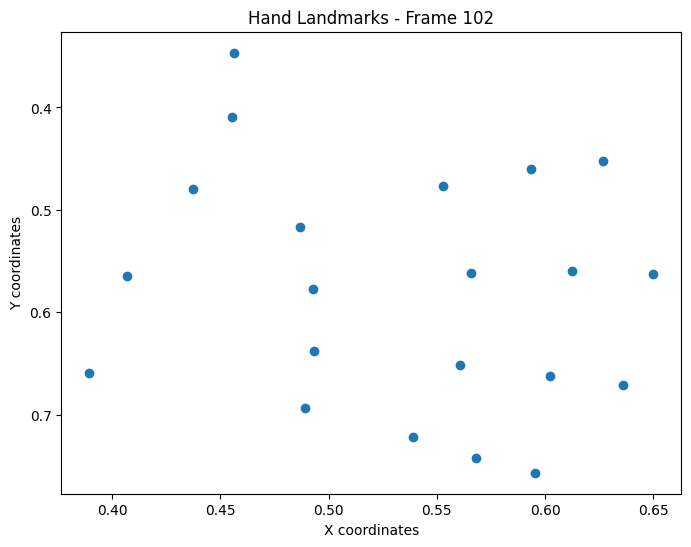

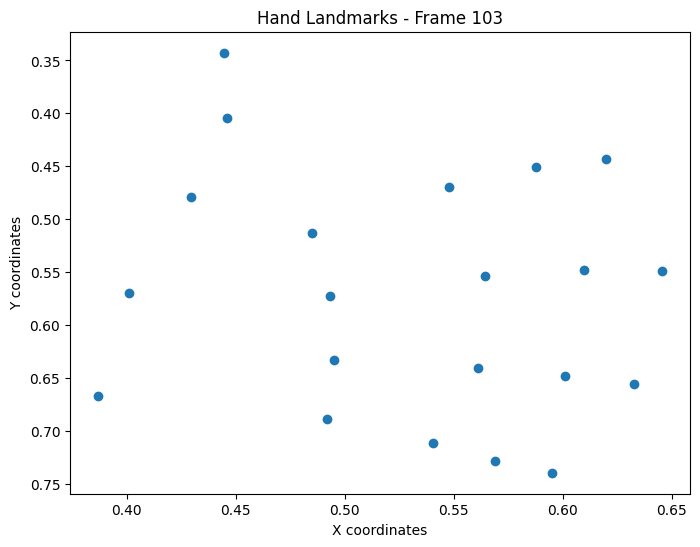

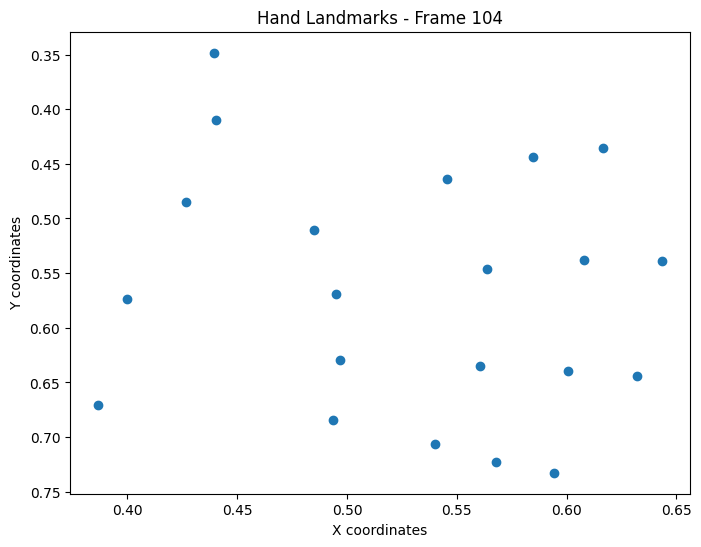

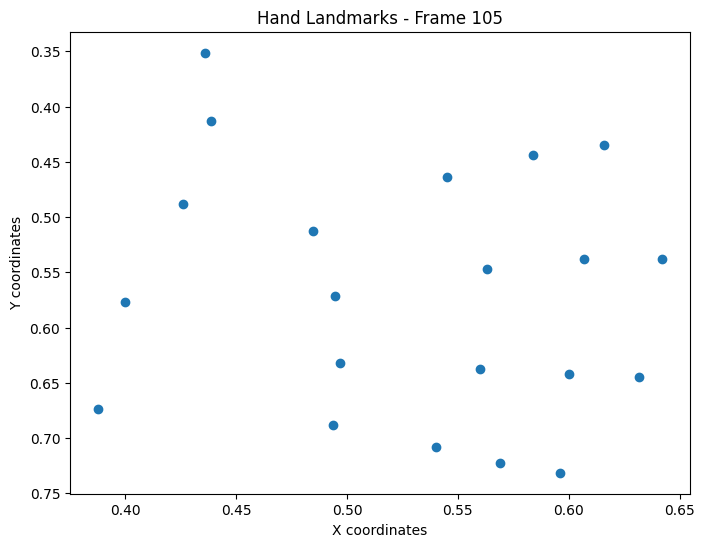

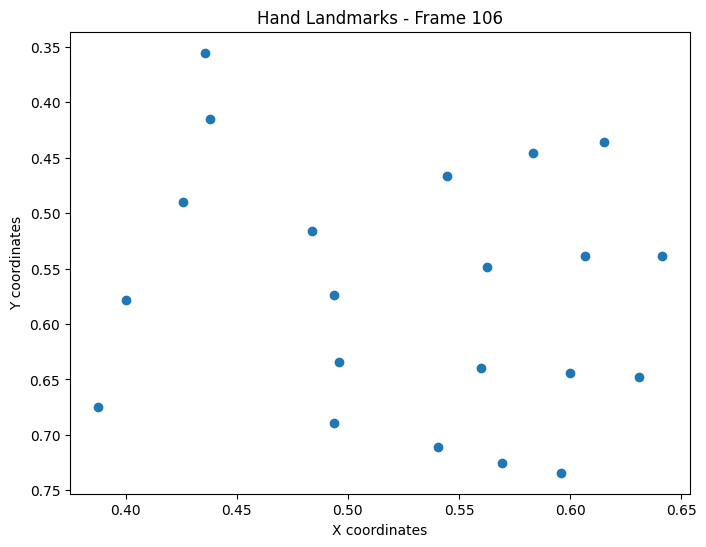

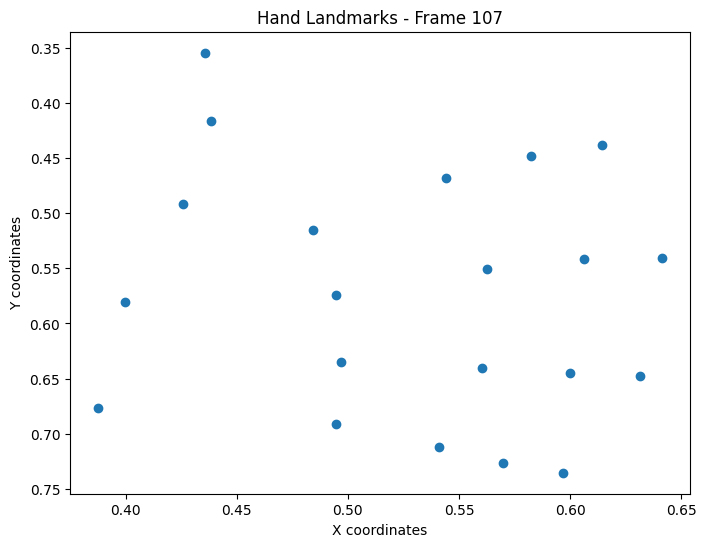

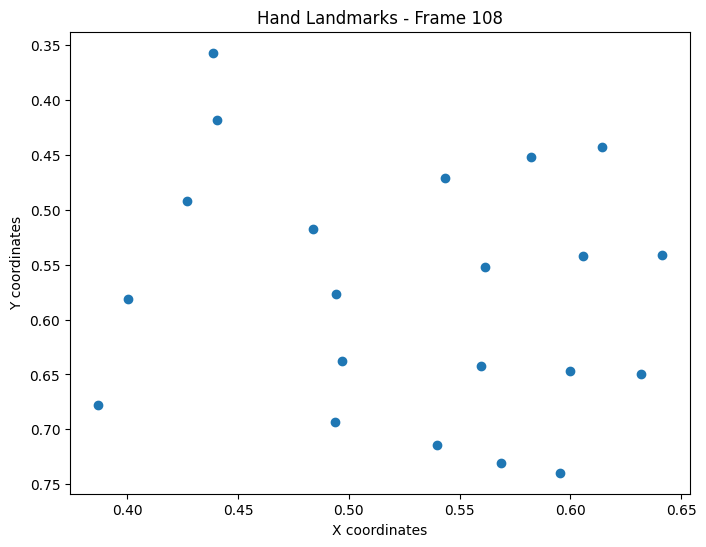

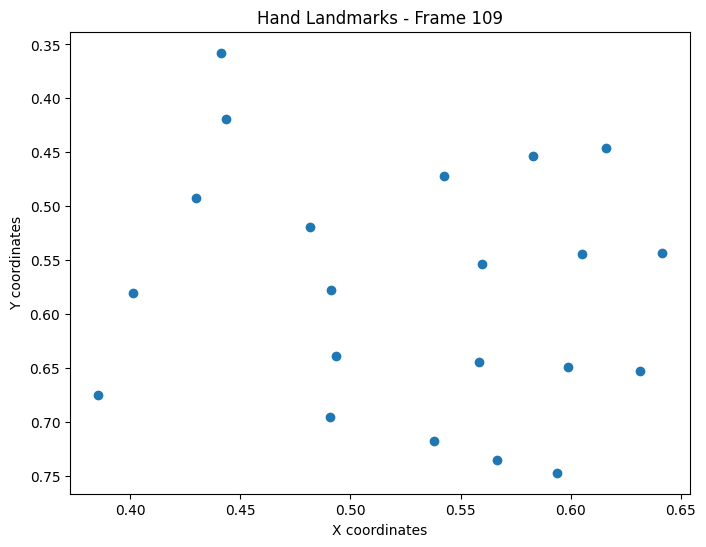

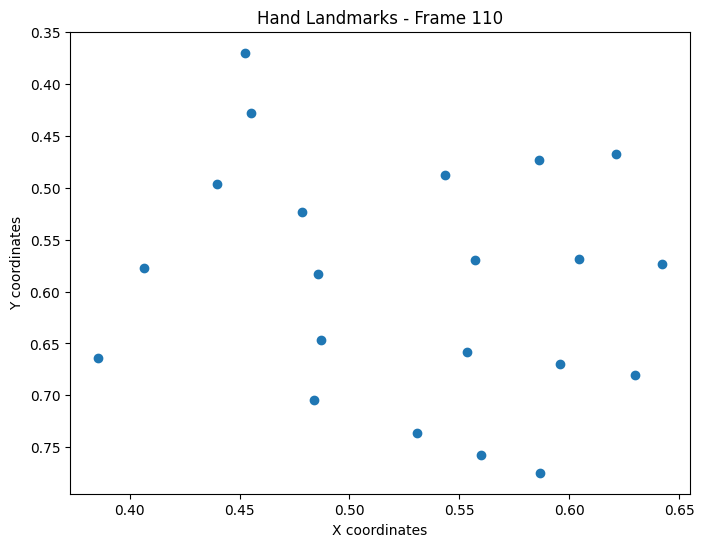

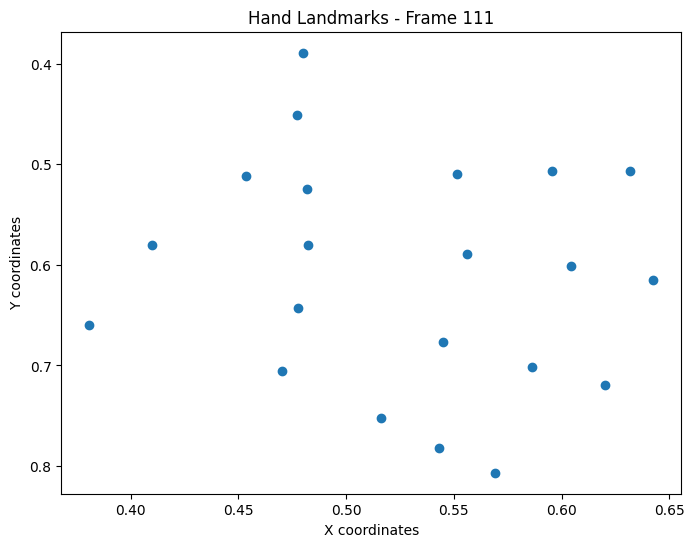

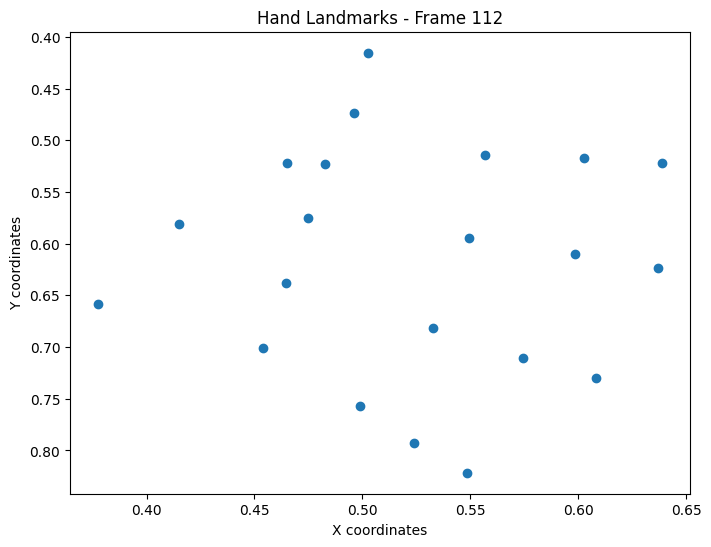

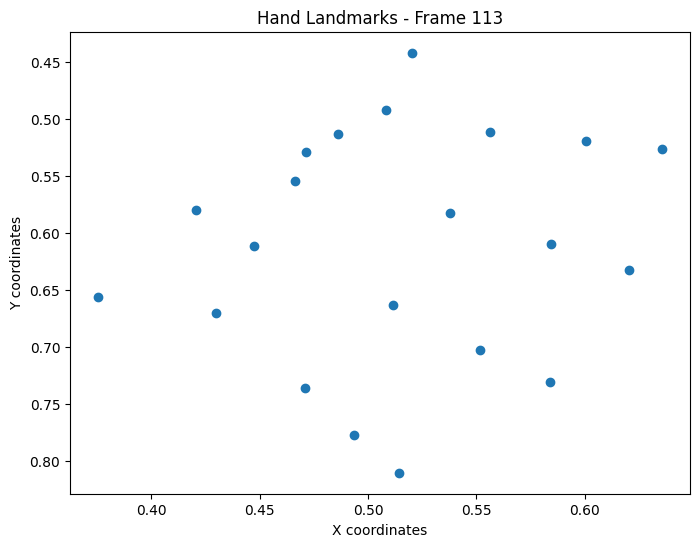

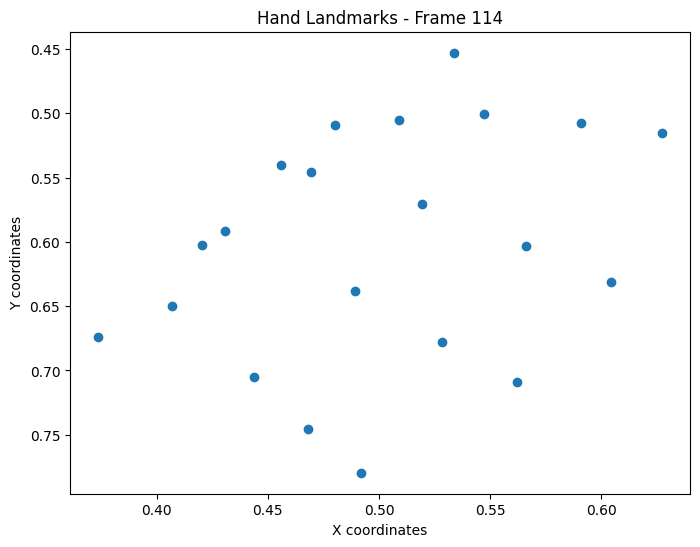

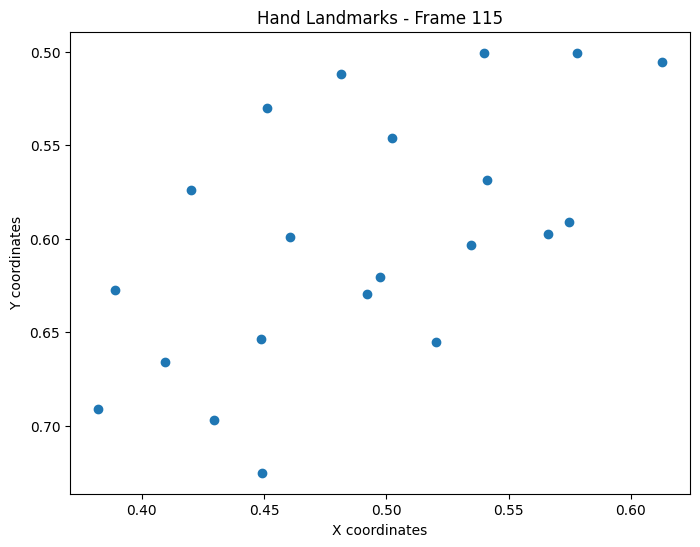

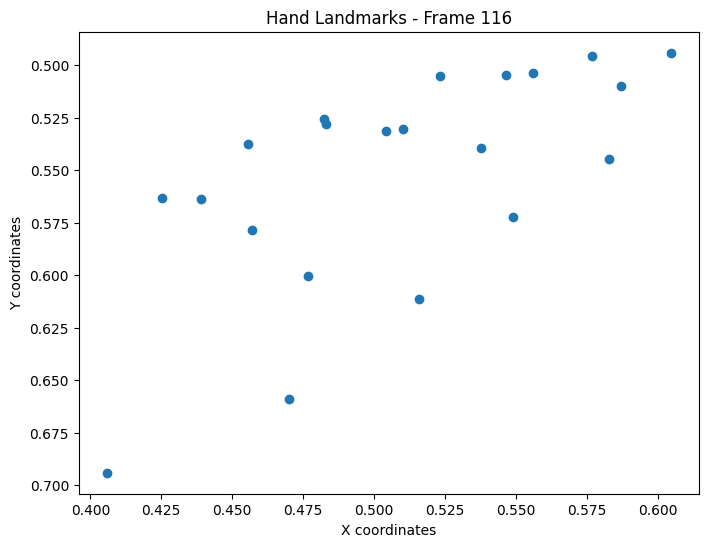

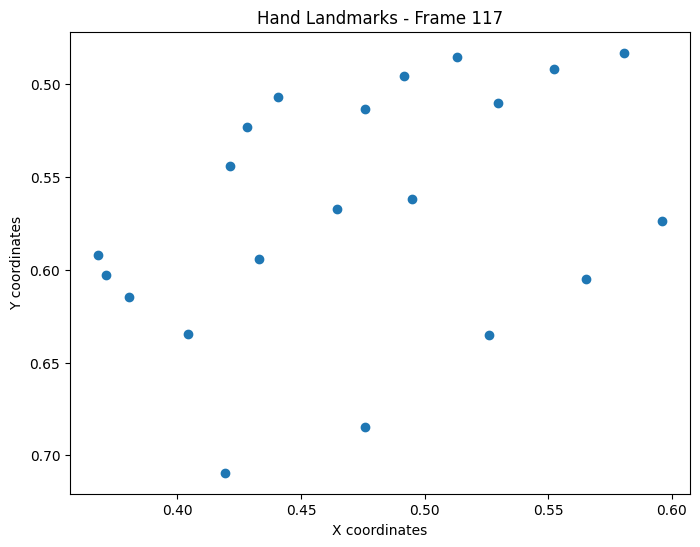

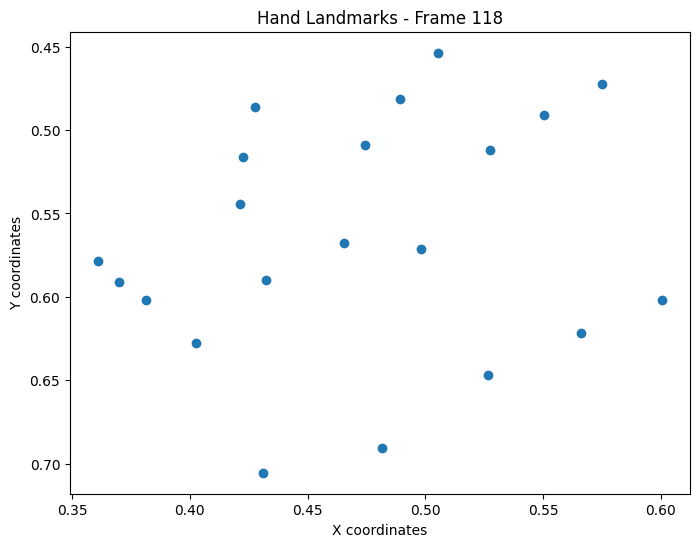

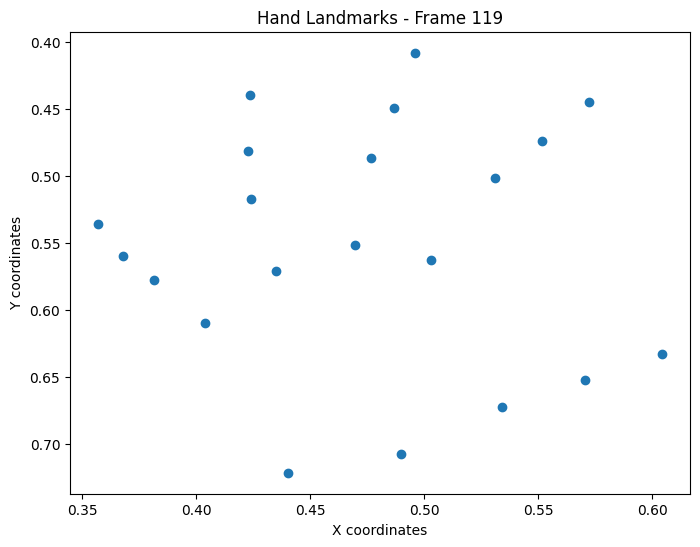

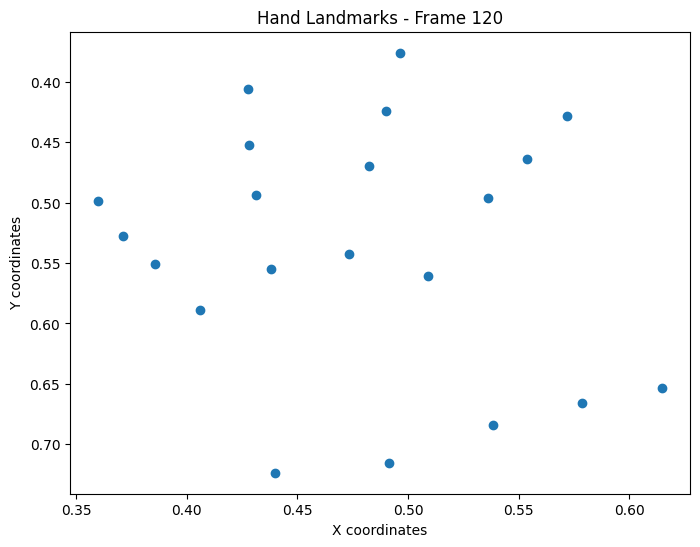

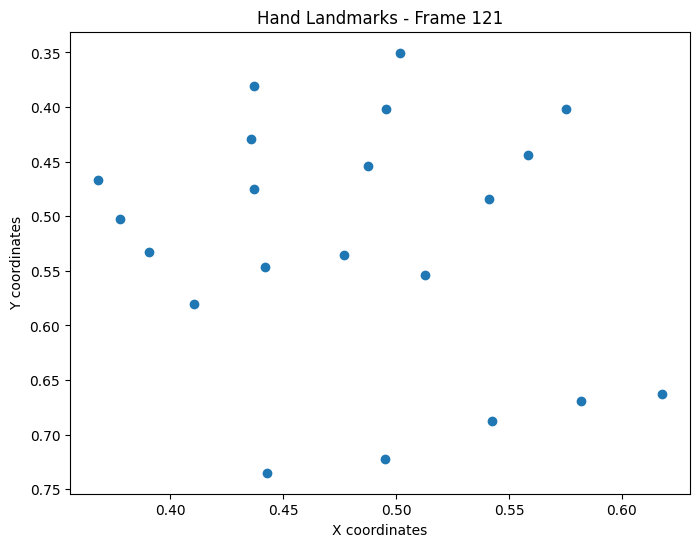

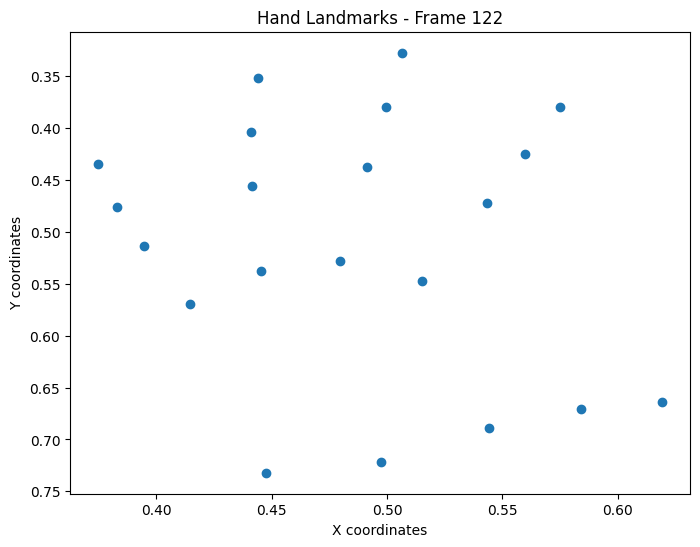

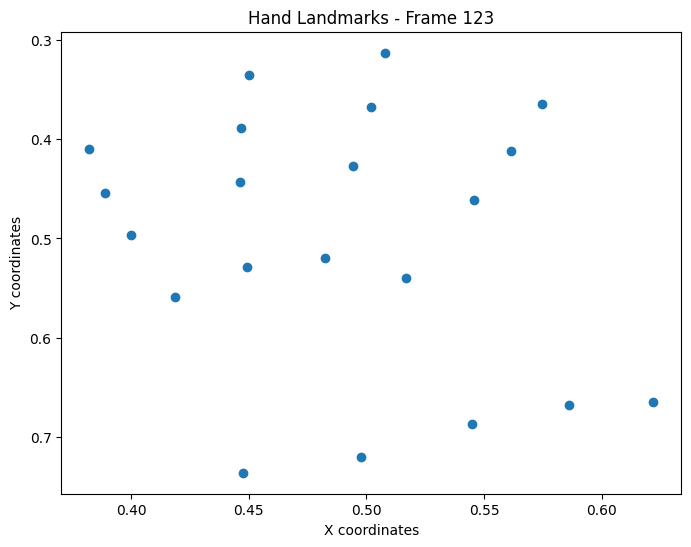

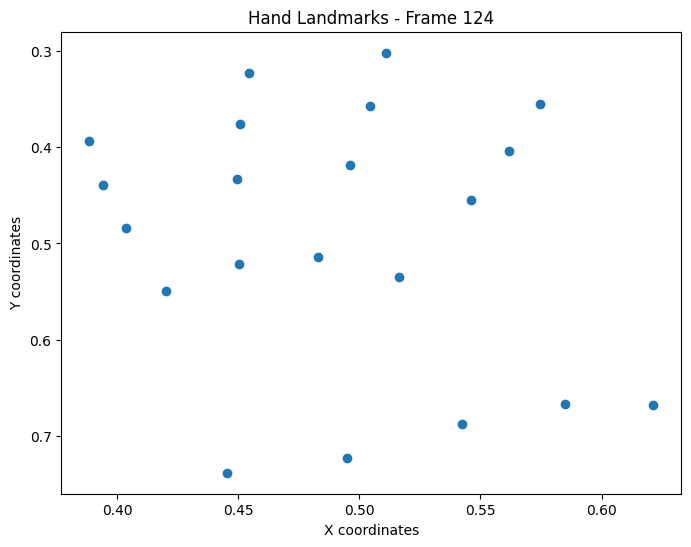

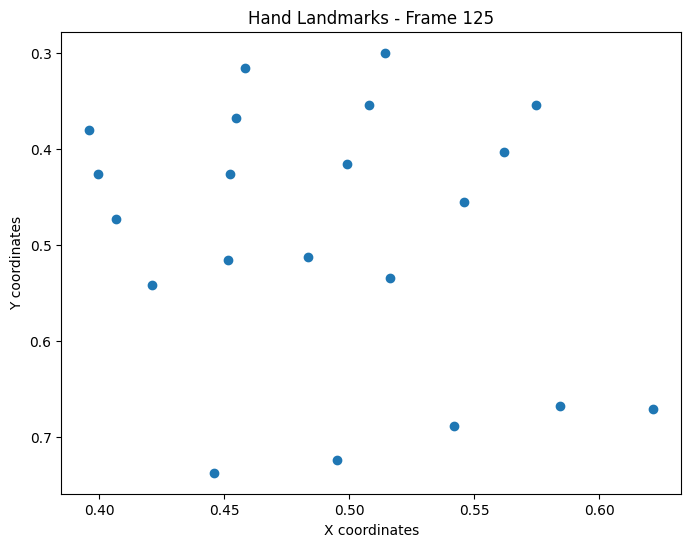

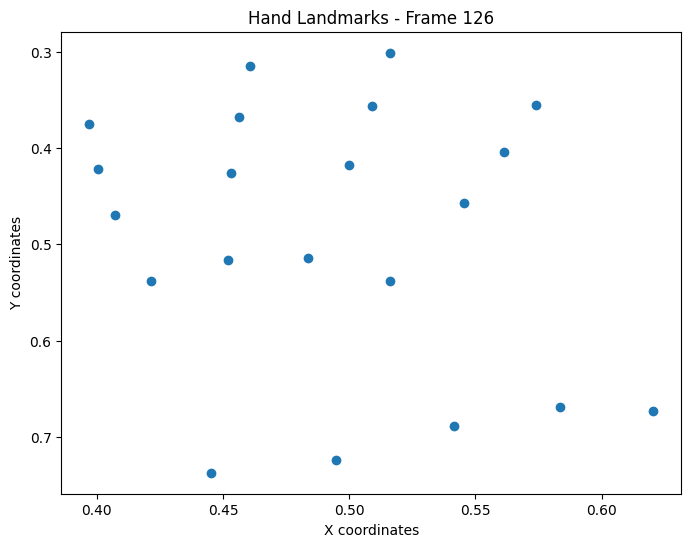

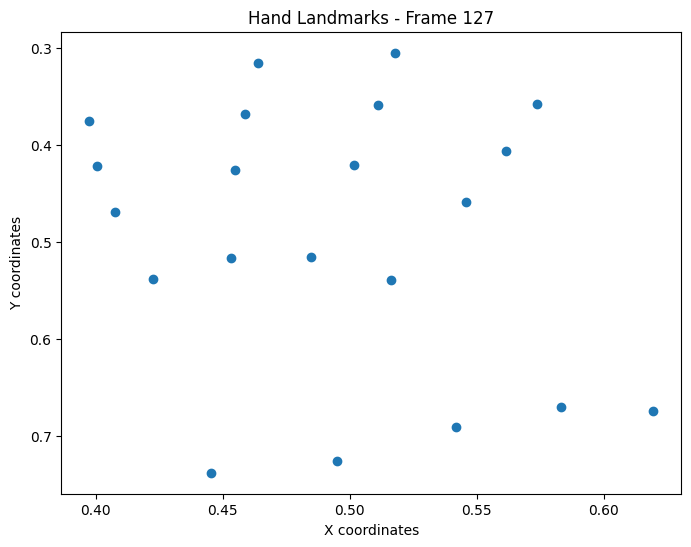

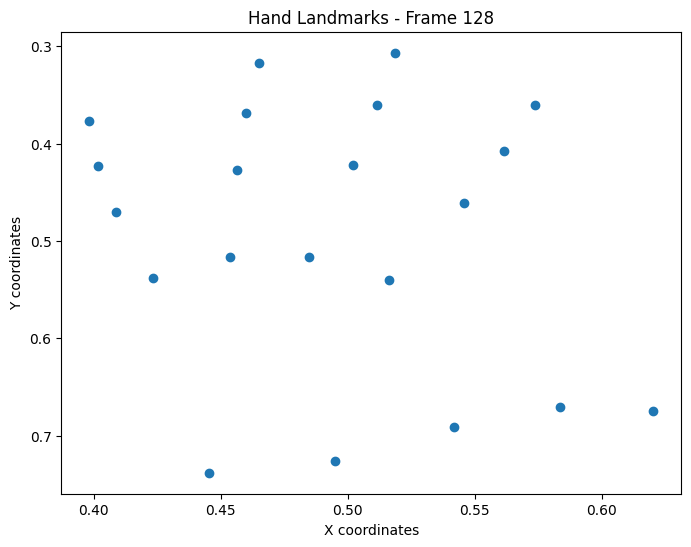

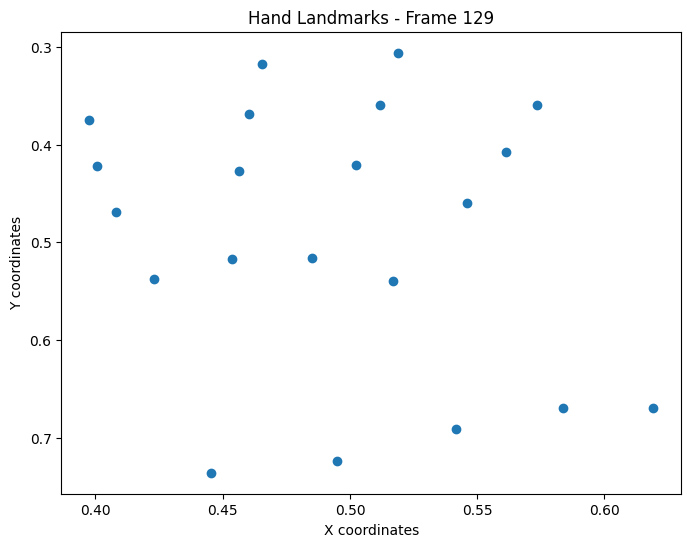

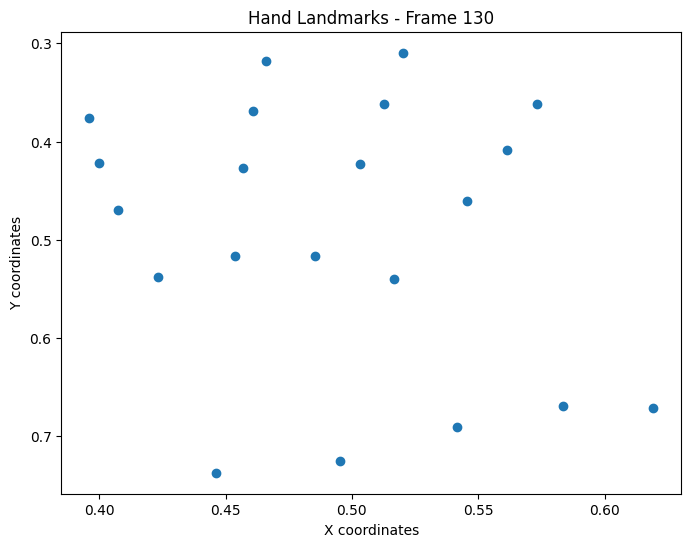

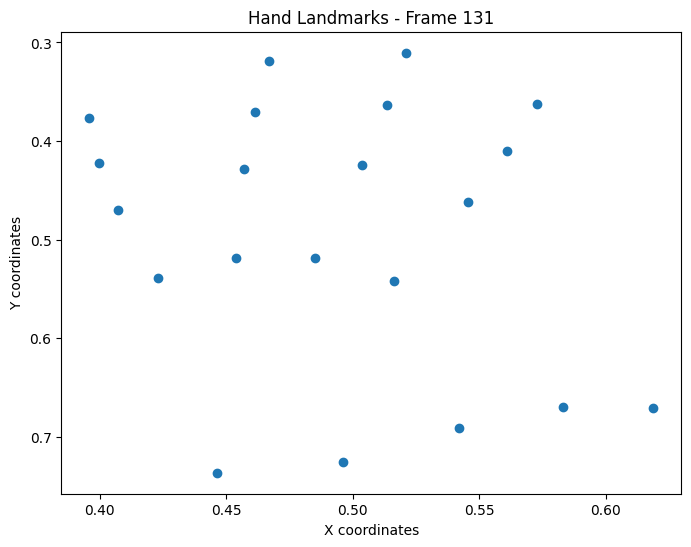

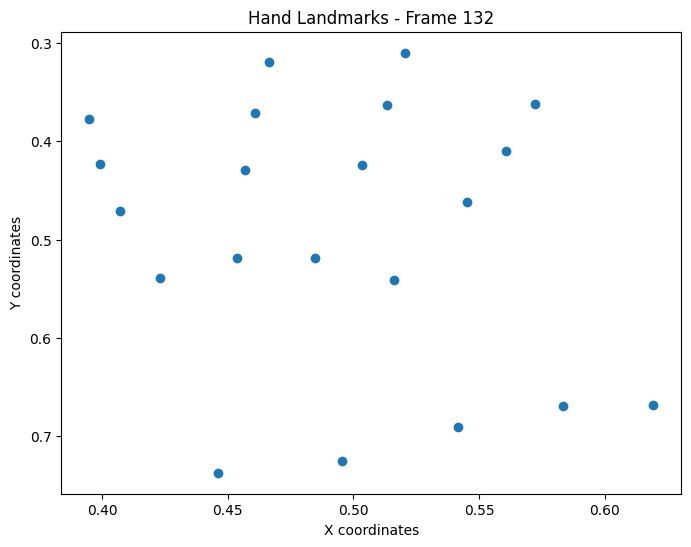

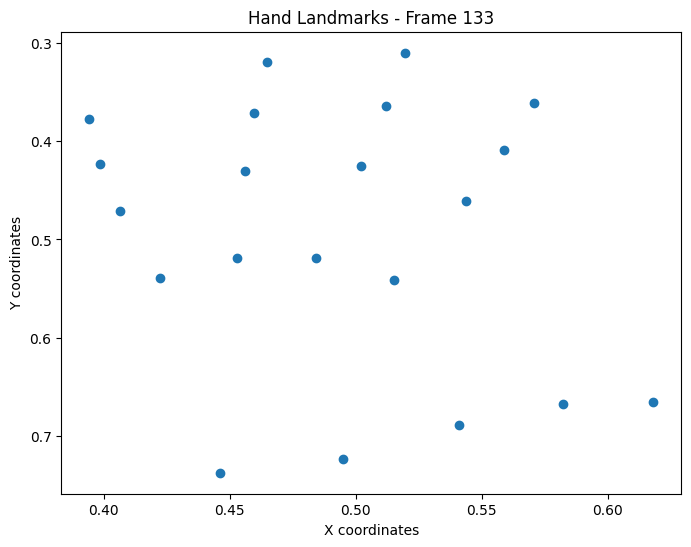

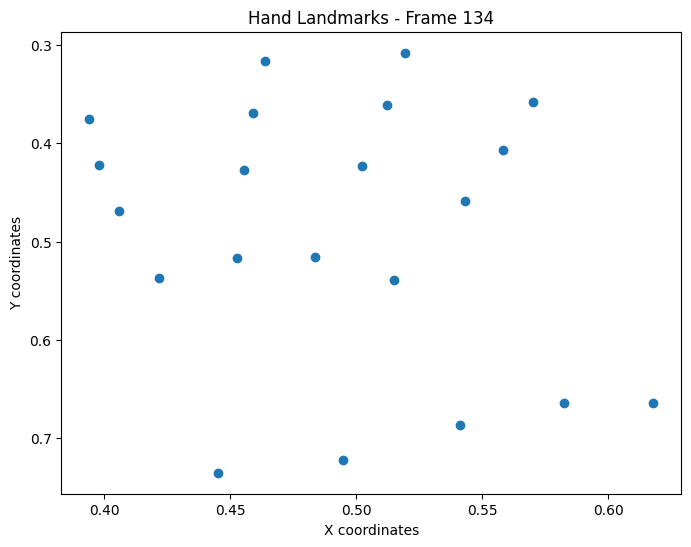

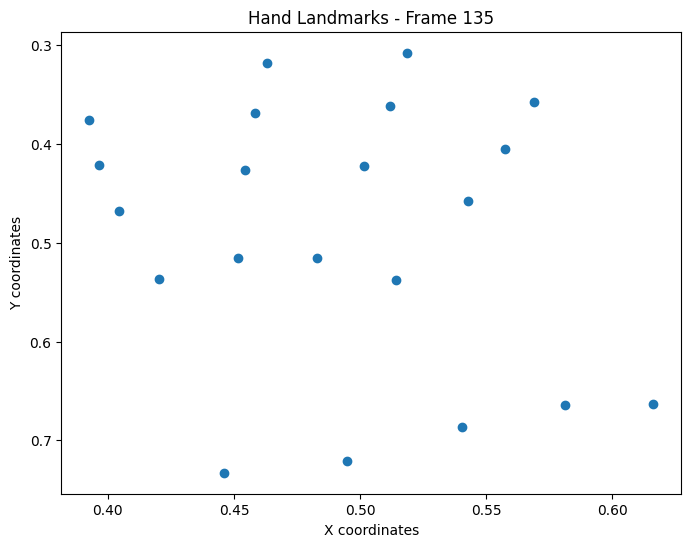

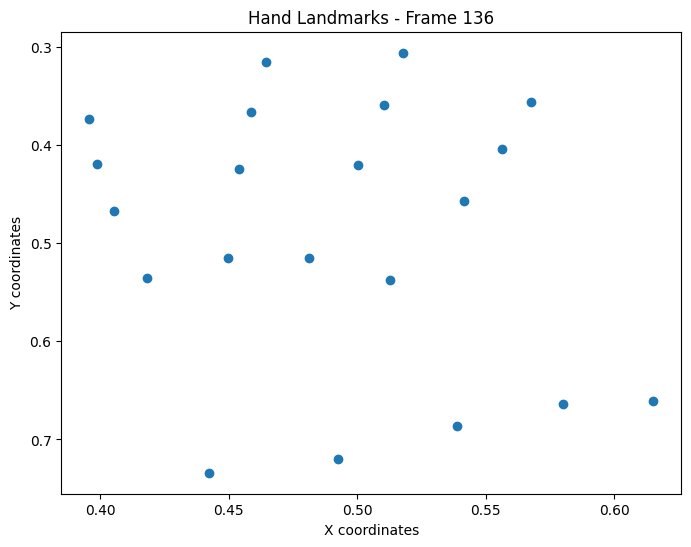

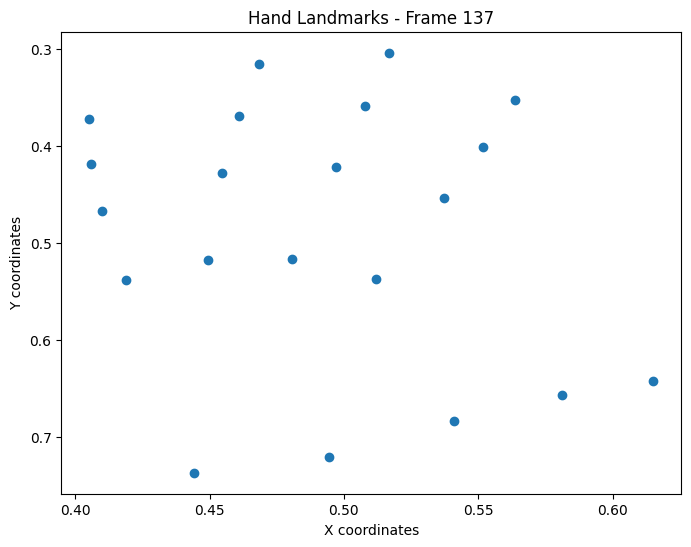

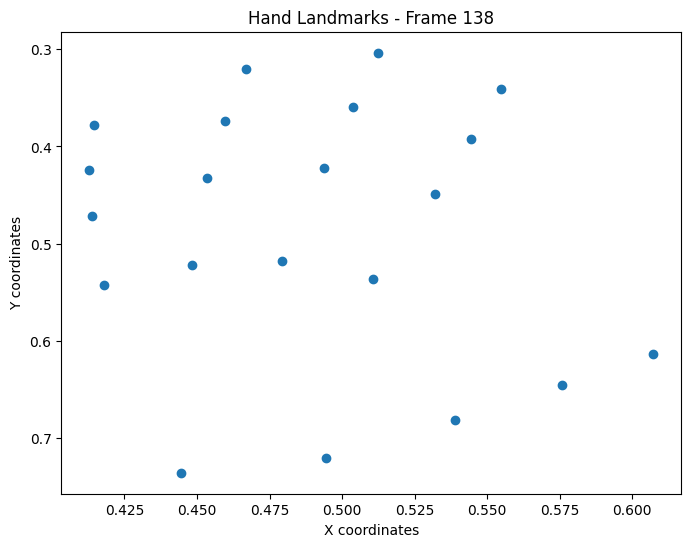

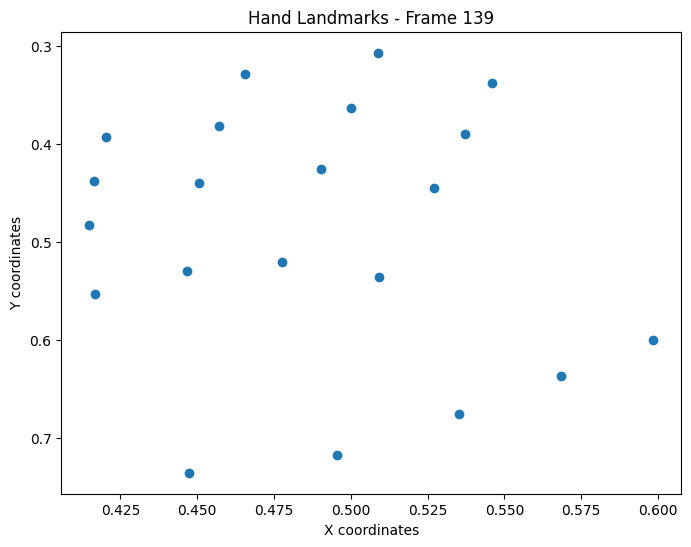

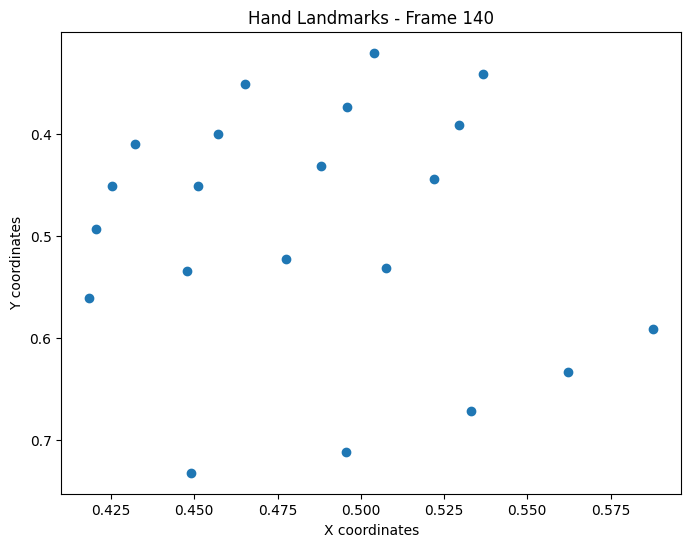

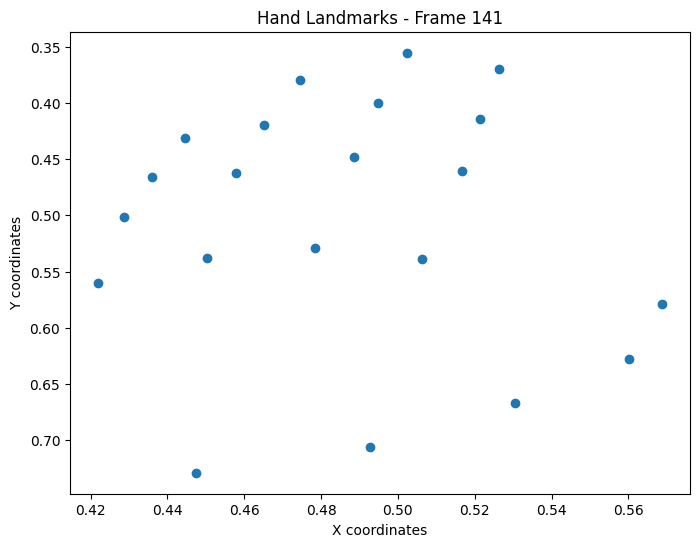

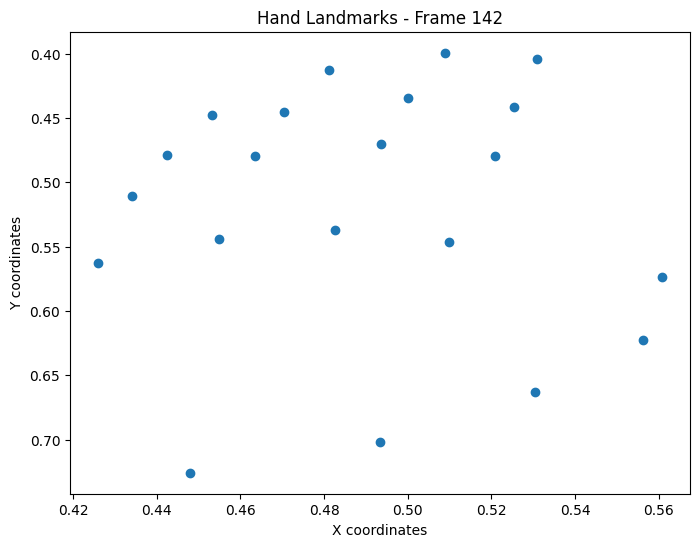

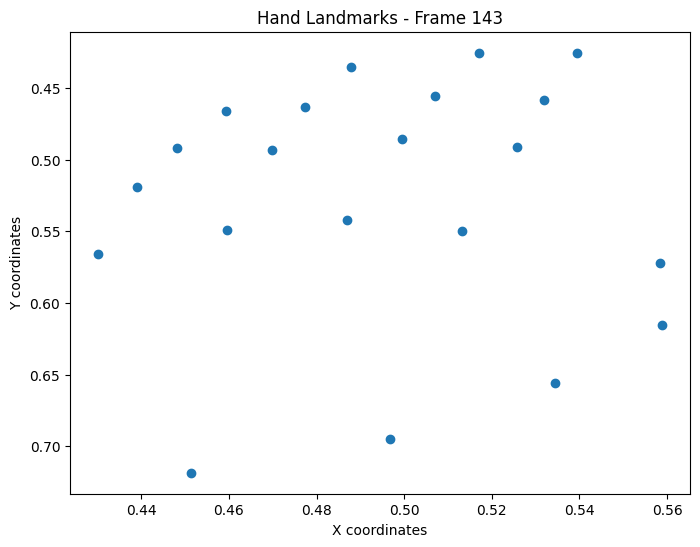

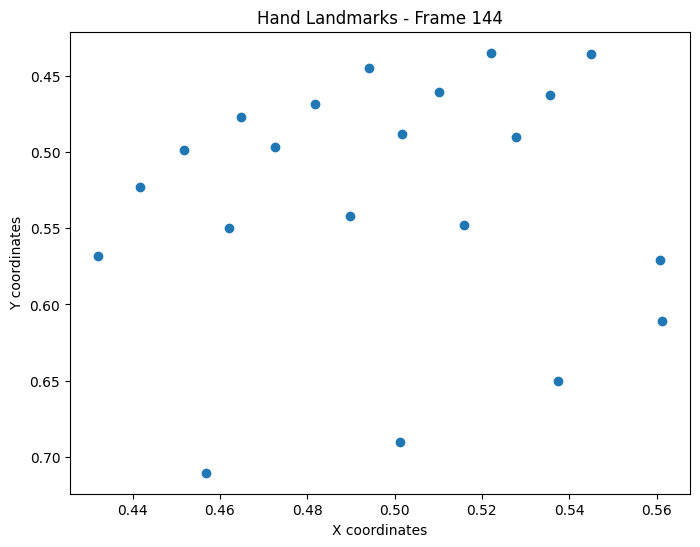

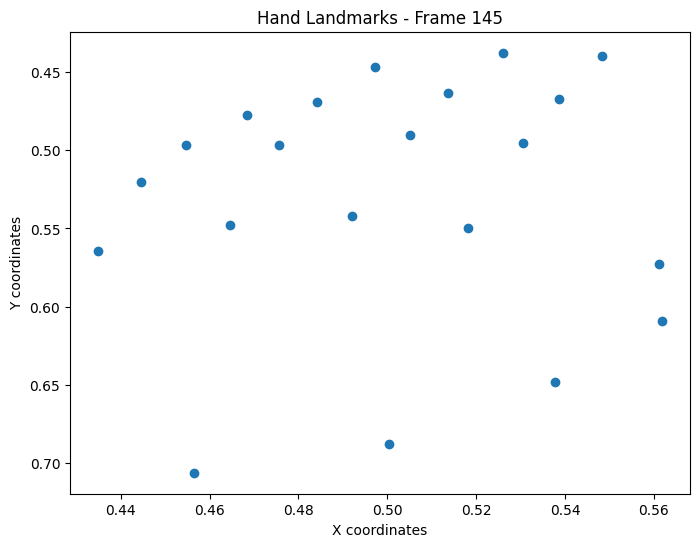

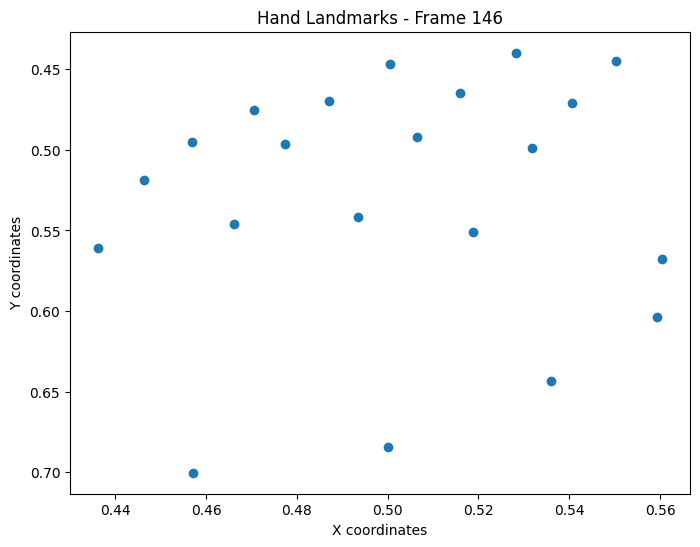

In [15]:
for frame_index in range(0, len(data), 1):  # Visualize every 5th frame
    landmarks = data[frame_index]
    x_coords = [lm[0] for lm in landmarks]
    y_coords = [lm[1] for lm in landmarks]

    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords)
    plt.title(f'Hand Landmarks - Frame {frame_index}')
    plt.xlabel('X coordinates')
    plt.ylabel('Y coordinates')
    plt.gca().invert_yaxis()
    plt.show()


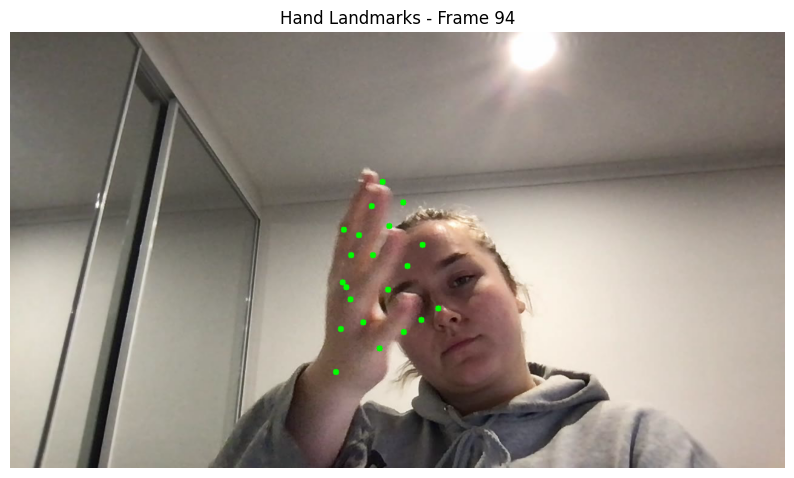

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the video and the corresponding landmarks
video_path = '/Users/kravtsova/Desktop/uni/2024/thesis/thesis B/conductor_1/data/raw_videos/4_4_60bpm/4_4_60bpm_sample_2.avi'  # Your video file path
landmarks_path = '/Users/kravtsova/Desktop/uni/2024/thesis/thesis B/conductor_1/data/processed_data/4_4_60bpm/4_4_60bpm_sample_2.npy'  # Your landmarks file path
data = np.load(landmarks_path)

# Open the video file
cap = cv2.VideoCapture(video_path)

frame_index = 94  # Change this to visualize different frames

# Read the frame
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)  # Move to the desired frame
ret, frame = cap.read()

if ret and data.shape[0] > 0:
    landmarks = data[frame_index]
    
    # Overlay landmarks on the frame
    for lm in landmarks:
        x, y = int(lm[0] * frame.shape[1]), int(lm[1] * frame.shape[0])
        cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)  # Green circles for landmarks
    
    # Display the full frame with landmarks
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(f'Hand Landmarks - Frame {frame_index}')
    plt.axis('off')
    plt.show()
else:
    print("Failed to load frame or no landmarks detected.")

# Release the video capture object
cap.release()


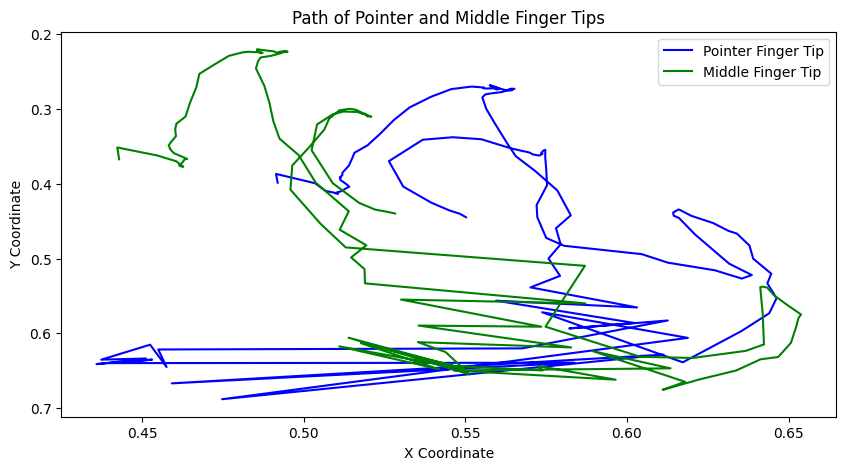

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the landmarks data from the .npy file
file_path = '/Users/kravtsova/Desktop/uni/2024/thesis/thesis B/conductor_1/data/processed_data/4_4_60bpm/4_4_60bpm_sample_1.npy'  # Replace with your file path
data = np.load(file_path)

# Lists to store the X and Y coordinates of the pointer and middle finger tips
pointer_tip_x = []
pointer_tip_y = []
middle_tip_x = []
middle_tip_y = []

# Indices for the fingertip landmarks
pointer_tip_idx = 8
middle_tip_idx = 12

# Extract the coordinates for each frame
for frame_landmarks in data:
    pointer_tip_x.append(frame_landmarks[pointer_tip_idx][0])
    pointer_tip_y.append(frame_landmarks[pointer_tip_idx][1])
    middle_tip_x.append(frame_landmarks[middle_tip_idx][0])
    middle_tip_y.append(frame_landmarks[middle_tip_idx][1])

# Plotting the path of the pointer finger tip
plt.figure(figsize=(10, 5))
plt.plot(pointer_tip_x, pointer_tip_y, label='Pointer Finger Tip', color='blue')
plt.plot(middle_tip_x, middle_tip_y, label='Middle Finger Tip', color='green')
plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Path of Pointer and Middle Finger Tips')
plt.legend()
plt.show()


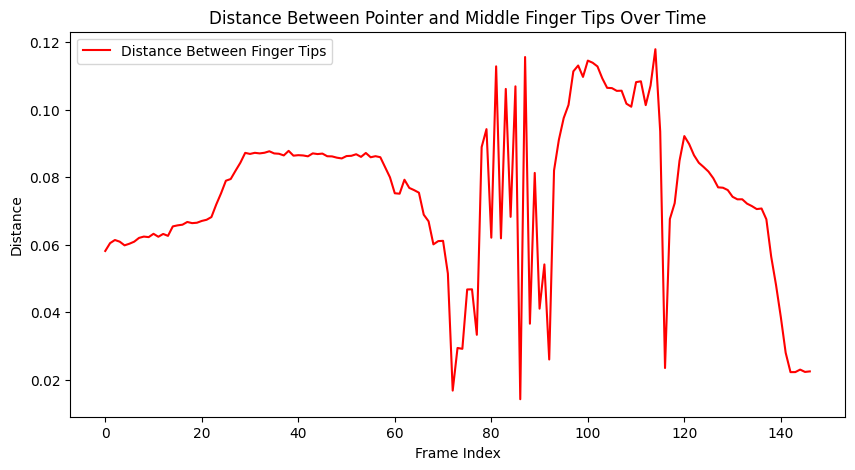

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the Euclidean distance between the finger tips in each frame
distances = np.sqrt((np.array(pointer_tip_x) - np.array(middle_tip_x))**2 + (np.array(pointer_tip_y) - np.array(middle_tip_y))**2)

# Plot the distance over time
plt.figure(figsize=(10, 5))
plt.plot(distances, label='Distance Between Finger Tips', color='red')
plt.xlabel('Frame Index')
plt.ylabel('Distance')
plt.title('Distance Between Pointer and Middle Finger Tips Over Time')
plt.legend()
plt.show()


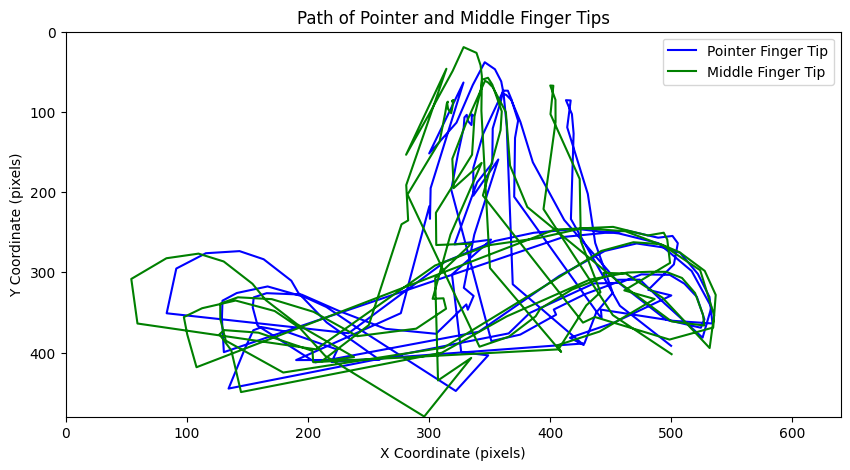

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load the landmarks data from the .npy file
file_path = '/Users/kravtsova/Desktop/uni/2024/thesis/thesis B/conductor_1/data/processed_data/4_4_60bpm/4_4_60bpm_sample_3.npy'  # Replace with your file path
data = np.load(file_path)

# Assuming the original frame dimensions are known
frame_width = 640  # Replace with the actual width of your video frame
frame_height = 480  # Replace with the actual height of your video frame

# Lists to store the X and Y coordinates of the pointer and middle finger tips
pointer_tip_x = []
pointer_tip_y = []
middle_tip_x = []
middle_tip_y = []

# Indices for the fingertip landmarks
pointer_tip_idx = 8
middle_tip_idx = 12

# Extract the coordinates for each frame and scale them to the frame dimensions
for frame_landmarks in data:
    pointer_tip_x.append(frame_landmarks[pointer_tip_idx][0] * frame_width)
    pointer_tip_y.append(frame_landmarks[pointer_tip_idx][1] * frame_height)
    middle_tip_x.append(frame_landmarks[middle_tip_idx][0] * frame_width)
    middle_tip_y.append(frame_landmarks[middle_tip_idx][1] * frame_height)

# Plotting the path of the pointer finger tip
plt.figure(figsize=(10, 5))
plt.plot(pointer_tip_x, pointer_tip_y, label='Pointer Finger Tip', color='blue')
plt.plot(middle_tip_x, middle_tip_y, label='Middle Finger Tip', color='green')

# Set plot limits to match the frame dimensions
plt.xlim(0, frame_width)
plt.ylim(frame_height, 0)  # Invert the Y-axis to match image coordinates

# Labeling the plot
plt.xlabel('X Coordinate (pixels)')
plt.ylabel('Y Coordinate (pixels)')
plt.title('Path of Pointer and Middle Finger Tips')
plt.legend()

# Show the plot
plt.show()
